# Voronoi


In [1]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import numpy as np


def obs_gen(c,r):
    ob_list=[]
    theta=np.arange(0,6.29,0.1)
    for angle in theta:
        ob_list.append([c[0]+r*np.cos(angle),c[1]+r*np.sin(angle)])
    return ob_list 
b=np.arange(-4,4,0.1)


b_=np.arange(-4,4,0.1)


wall1=[]
wall2=[]
wall3=[]
wall4=[]
wall1_=[]
wall2_=[]
wall3_=[]
wall4_=[]
for i in b:
    wall1.append([i,4])
    wall2.append([i,-4])
    wall3.append([4,i])
    wall4.append([-4,i])
for i in b_:
    wall1_.append([i,4])
    wall2_.append([i,-4])
    wall3_.append([4,i])
    wall4_.append([-4,i])

ob1=obs_gen([0,2],0.5)
ob3=obs_gen([0,-2],0.5)
ob2=obs_gen([1.5,0],0.7)
ob4=obs_gen([-1.5,0],0.5)


In [2]:
def dist_pos(p1,p2):
    vd=p1-p2
    return np.sqrt(vd[0]**2+vd[1]**2)

def to_del(arr):
    ind=[]
    for i,point in enumerate(arr):
        if dist_pos(point,[-1.5,0]) < 0.3:
            if not i in ind:
                ind.append(i)
        if dist_pos(point,[1.5,0]) < 0.3:
            if not i in ind:
                ind.append(i)
        if dist_pos(point,[0,2]) < 0.3:
            if not i in ind:
                ind.append(i)
        if dist_pos(point,[0,-2]) < 0.3:
            if not i in ind:
                ind.append(i)
        if dist_pos(point,[0,0]) > 6:
            if not i in ind:
                ind.append(i)
    return ind
def to_del2(ridges,unwanted_vertices):
    ind=[]
    for i,pair in enumerate(ridges):
        if (pair[0]==-1) or (pair[1]==-1):
            if not i in ind:
                ind.append(i)
        if (pair[0] in unwanted_vertices) or (pair[1] in unwanted_vertices):
            if not i in ind:
                ind.append(i)
    return ind





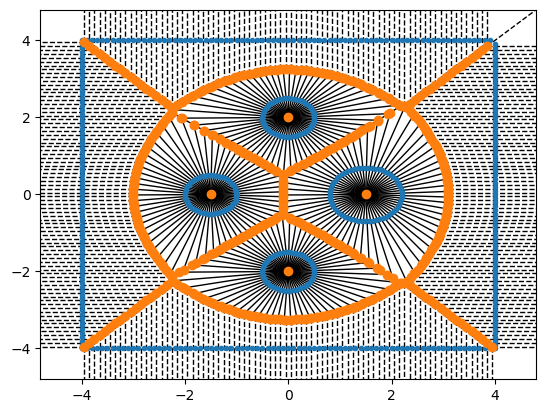

array([[245, 363],
       [363, 425],
       [422, 423],
       ...,
       [511, 512],
       [ 82, 513],
       [505, 512]])

In [3]:
vor = Voronoi(np.array([*(ob1),*(ob2),*(ob3),*(ob4),*(wall1),*(wall2),*(wall3),*(wall4)]))
unwanted_vertices=to_del(vor.vertices)
vertices_=np.delete(vor.vertices,to_del(vor.vertices),0)
ridges=np.delete(vor.ridge_vertices,to_del2(vor.ridge_vertices,unwanted_vertices),0)
fig = voronoi_plot_2d(vor,s=1)
plt.show()
ridges


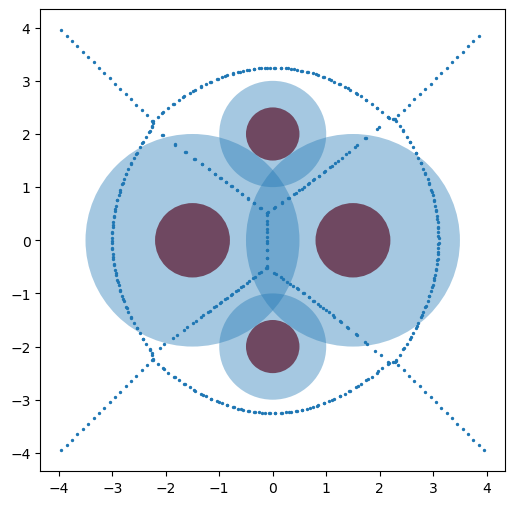

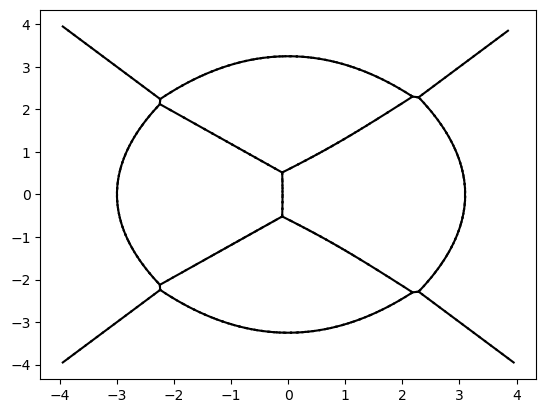

In [4]:
x_data=[]
y_data=[]
obs1=plt.Circle((0,2),0.5,fc='brown')
obs1_=plt.Circle((0,2),1,alpha=0.4)
obs2=plt.Circle((1.5,0),0.7,fc='brown')
obs2_=plt.Circle((1.5,0),2,alpha=0.4)
obs3=plt.Circle((0,-2),0.5,fc='brown')
obs3_=plt.Circle((0,-2),1,alpha=0.4)
obs4=plt.Circle((-1.5,0),0.7,fc='brown')
obs4_=plt.Circle((-1.5,0),2,alpha=0.4)
fig=plt.figure(figsize=(6,6))

plt.gca().add_patch(obs1)
plt.gca().add_patch(obs1_)
plt.gca().add_patch(obs2)
plt.gca().add_patch(obs2_)
plt.gca().add_patch(obs3)
plt.gca().add_patch(obs3_)
plt.gca().add_patch(obs4)
plt.gca().add_patch(obs4_)
vertices_=np.delete(vor.vertices,to_del(vor.vertices),0)
for i,tuple_ in enumerate(vertices_):
    # to many data points taking every seventh data
    if i%1==0:
     x_data.append(tuple_[0])
     y_data.append(tuple_[1])


plt.scatter(x_data,y_data,s=2)
fig2=plt.figure()
edges=[[-0.7854439996780953, -1.027127371001201]]
for pair in ridges:
    x=[vor.vertices[pair[0]][0],vor.vertices[pair[1]][0]]
    y=[vor.vertices[pair[0]][1],vor.vertices[pair[1]][1]]
    edges.append([x[1],y[1]])
    plt.plot(x,y,'k')



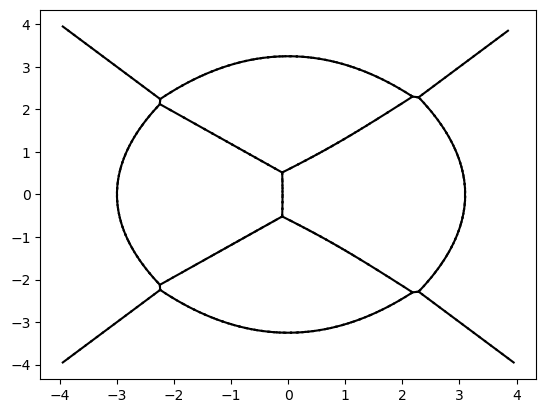

In [5]:

edges_=[]
for i,pair in enumerate(ridges):
    x=[vor.vertices[pair[0]][0],vor.vertices[pair[1]][0]]
    y=[vor.vertices[pair[0]][1],vor.vertices[pair[1]][1]]
    edges_.append([np.array([x[0],y[0]]),np.array([x[1],y[1]])])
    plt.plot(x,y,'k')
edges_=np.array(edges_)
vertices_=np.array(vertices_)

In [6]:
dict_={}
for v in vertices_:
    vert_dict={}
    for e in edges_:
        d=dist_pos((e[0]),(e[1]))
        if  np.array_equal(e[0],v):
            vert_dict[str(e[1][0])+','+str(e[1][1])]=d
        elif np.array_equal(e[1],v):
            vert_dict[str(e[0][0])+','+str(e[0][1])]=d
    dict_[str(v[0])+','+str(v[1])]=vert_dict


In [17]:

goal=np.array([1.5,1.5])
start=np.array([0,-3.5])
closest_goal=10000
closest_start=10000
gd =[]
sd=[]

for vertex in vertices_:
    if(dist_pos(vertex,start)< closest_start):
        sd=vertex
        closest_start=dist_pos(vertex,start)
    if(dist_pos(vertex,goal)< closest_goal):
        gd=vertex
        closest_goal=dist_pos(vertex,goal)

sd,gd


(array([ 0.04702744, -3.24977383]), array([1.37162665, 1.61740979]))

In [18]:
import heapq
import sys

class Graph:
    
    def __init__(self):
        self.vertices = {}
        
    def add_vertex(self, name, edges):
        self.vertices[name] = edges
    
    def shortest_path(self, start, finish):
        distances = {} 
        previous = {}  
        nodes = [] 

        for vertex in self.vertices:
            if vertex == start:
                distances[vertex] = 0
                heapq.heappush(nodes, [0, vertex])
            else:
                distances[vertex] = sys.maxsize
                heapq.heappush(nodes, [sys.maxsize, vertex])
            previous[vertex] = None
        
        while nodes:
            smallest = heapq.heappop(nodes)[1]
            if smallest == finish: 
                path = []
                while previous[smallest]: 
                    path.append(smallest)
                    smallest = previous[smallest]
                return path
            if distances[smallest] == sys.maxsize:
                break
            
            for neighbor in self.vertices[smallest]:
                alt = distances[smallest] + self.vertices[smallest][neighbor]
                if alt < distances[neighbor]:
                    distances[neighbor] = alt
                    previous[neighbor] = smallest
                    for n in nodes:
                        if n[1] == neighbor:
                            n[0] = alt
                            break
                    heapq.heapify(nodes)
        return distances
        
    def __str__(self):
        return str(self.vertices)

if __name__ == '__main__':
    g = Graph()
    for v,adj in dict_.items():
        g.add_vertex(v,adj)
    
    
    path=g.shortest_path(str(sd[0])+','+str(sd[1]), str(gd[0])+','+str(gd[1]))
  


In [23]:
co_ordinate=[goal]
path.append(str(sd[0])+','+str(sd[1]))
for i,node in enumerate(path):
    if i%1==0:
        a=node.split(',')
        co_ordinate.append([float(a[0]),float(a[1])])
co_ordinate.append(start)
print(path)


['1.3716266527753664,1.6174097935931813', '1.2910633953812218,1.5531787294933728', '1.2282650243715563,1.5000803037028234', '1.1732251685623882,1.4574045245720935', '1.0996248988899542,1.3965322104845397', '1.0656938282847161,1.371023402966616', '0.9809008094629285,1.3026666841170018', '0.9653985468569097,1.2913928853117647', '0.8698581887990513,1.2165445683780887', '0.8684868483993584,1.2153853752522974', '0.7764944168645621,1.1455059185866285', '0.7597831532772354,1.1317765750250295', '0.6843319502656542,1.076272039504854', '0.6519211029464466,1.0504539426274084', '0.591687538779103,1.0075468667352183', '0.5424053596465499,0.9695323623618224', '0.4968413138435992,0.938067705904003', '0.4286222609077702,0.8871191620117335', '0.3979115295313497,0.8665143543999853', '0.3075904812181771,0.8011379325054183', '0.29270516980385225,0.7914040742064968', '0.17849231623960232,0.7111192031965633', '0.1757419994348137,0.7090549511285084', '0.051770245309927194,0.6241842860481236', '0.028805095585

In [24]:
odom_data=np.array([(-4.847649588744698e-05, -3.4997012446678966), (-4.859588381820115e-05, -3.4997005205537595), (-4.8715285097036647e-05, -3.4996997964136045), (-4.883831855865238e-05, -3.4996990503025946), (-4.895774694206167e-05, -3.499698326109612), (-4.907718867740423e-05, -3.499697601890609), (-4.920026382558302e-05, -3.4996968556983585), (-4.931973267334119e-05, -3.4996961314265205), (-0.00010617806963076574, -3.4996962881383507), (-0.00017737766770261135, -3.499698461474805), (-0.0002463005774115609, -3.4997012242155594), (-0.00031508468972735355, -3.499704518119788), (-0.00038585790161667615, -3.499708466833317), (-0.0004544950488082188, -3.49971283943709), (-0.0005231080482363979, -3.4997177458608184), (-0.0005937992719964435, -3.49972336166335), (-0.0006624311235730223, -3.4997293590449083), (-0.0007310916961917151, -3.4997358975971986), (-0.0008018796087013056, -3.499743203574188), (-0.0008706277855837366, -3.499750849491528), (-0.0009394295281218183, -3.499759044830648), (-0.0010103743598058991, -3.4997680665530746), (-0.0010792878184317572, -3.4997773863406794), (-0.0011482640831894115, -3.499787264652228), (-0.0012193921506384762, -3.4997980293735553), (-0.001288483428518273, -3.4998090496542185), (-0.0013576244813386486, -3.4998206358786463), (-0.001428907851433809, -3.4998331675179353), (-0.0014981355159941747, -3.499845909701847), (-0.001567398519362796, -3.499859224579694), (-0.0016387921059478807, -3.4998735442035764), (-0.0017081114334859867, -3.499888028409906), (-0.0017774506691831306, -3.499903091711296), (-0.0018489062773573602, -3.499919219293741), (-0.001918269377912724, -3.4999354644928333), (-0.001987635803553439, -3.499952294742617), (-0.002059101636102364, -3.4999702488625877), (-0.002128456938709445, -3.4999882725501847), (-0.002197797636227858, -3.500006886666787), (-0.002269218263492332, -3.500026684094962), (-0.0023385163408828086, -3.500046502763787), (-0.0024077864592454506, -3.500066918073899), (-0.002479118790919251, -3.500088577410713), (-0.0025483096719585074, -3.500110207892064), (-0.0026174499935144235, -3.50013243851384), (-0.002688624210590461, -3.5001559714008716), (-0.002757637202589265, -3.5001794229788814), (-0.002826574793431054, -3.5002034767894568), (-0.0028975184702416303, -3.500228889498218), (-0.002966201370704226, -3.5002541304159096), (-0.0030346599448005307, -3.5002799544061394), (-0.003104983228532035, -3.500307173897849), (-0.0031730565865724886, -3.500334198893025), (-0.0032409323774902285, -3.500361805283552), (-0.0033106518542837917, -3.5003908496237828), (-0.003378105564704899, -3.500419621935375), (-0.0034453835014297976, -3.500448975950114), (-0.003514520460416727, -3.500479834964613), (-0.0035814601862748934, -3.5005103870467122), (-0.003648237991822954, -3.5005415331796907), (-0.003716856546053473, -3.500574241233306), (-0.003783232951154605, -3.500606558951686), (-0.0038493247934945443, -3.5006394075565206), (-0.003713406237980749, -3.500575055008399), (-0.0032158680833037586, -3.5003375790662203), (-0.002417355329960206, -3.499947501787974), (-0.0013029517540549926, -3.4993941774077615), (5.7562168911832155e-05, -3.498719623640251), (0.00168992623189459, -3.4979199740821465), (0.0036727085918438814, -3.4969721446575535), (0.005716142255309705, -3.4960317703955073), (0.00785643542142975, -3.495080313635849), (0.009900644672755636, -3.4941962823375605), (0.011285633361364764, -3.493600038267368), (0.011904724259744965, -3.49333106501546), (0.011932703779348472, -3.493320209795982), (0.011858895052460183, -3.493356007908782), (0.011785504052057737, -3.4933918974689266), (0.011772751068551112, -3.493399023109432), (0.01204443716811671, -3.4932684150392843), (0.012856699534058656, -3.492883066939237), (0.014295668533773715, -3.4922129274672735), (0.016315197918034225, -3.491295633900482), (0.018753102348713125, -3.490217620937767), (0.021054867411715708, -3.4892150009690113), (0.02256234285914996, -3.4885589940446273), (0.02315432309005796, -3.4882997246226424), (0.023159498318645416, -3.4882987578760596), (0.023096878110770443, -3.488328192308607), (0.023034454068185124, -3.4883581100583316), (0.022970308790544798, -3.4883894581822656), (0.023307671377160676, -3.4882296548769087), (0.024375517646898034, -3.4877131429159647), (0.026224399262575245, -3.4868075213152467), (0.02874050262511617, -3.485561854548286), (0.03167193043634471, -3.484099102819041), (0.034714155690721914, -3.4825782356498474), (0.037667728474136984, -3.4810978790704565), (0.04062198439841399, -3.4796135138808024), (0.043683043522586174, -3.478074718678765), (0.046659360798448644, -3.476583297066833), (0.049637670402478316, -3.4750951794679987), (0.05269357765127994, -3.4735703581969233), (0.05565512947523694, -3.472089731799651), (0.05861506353324464, -3.4706068251303974), (0.06165968041618291, -3.4690772298056944), (0.06459775742858781, -3.4675947668366462), (0.06744128452677581, -3.466155277992636), (0.07033468563228976, -3.464686440740566), (0.0731703521771745, -3.4632446132233743), (0.07606417890885131, -3.461770370425392), (0.07903548638644041, -3.460262861853874), (0.08191546223516262, -3.45881141214153), (0.08483209485499561, -3.4573472351229335), (0.08786150613163772, -3.455829690898864), (0.09077798292850198, -3.4543701801328215), (0.09370206682397028, -3.4529032332267127), (0.09671513352504227, -3.4513875033509147), (0.09965507599062394, -3.44990743617955), (0.10260268029038934, -3.4484278124374765), (0.10564383283664908, -3.4469055416168075), (0.10858093448836749, -3.445436748939692), (0.11151917367269928, -3.443963480560923), (0.11454750233181502, -3.4424410793414597), (0.11748777408623583, -3.440959116582207), (0.12044537005296034, -3.4394675208131287), (0.1234994080225806, -3.437931978703936), (0.1264678493560021, -3.436443896962013), (0.1294403660071351, -3.4349581803023757), (0.13248988484916216, -3.4334356702793243), (0.13544806964706227, -3.431955072317906), (0.13840694855484903, -3.4304709362419445), (0.14145587179808286, -3.4289385170482682), (0.1444257074418521, -3.4274436449023304), (0.1473985828177141, -3.4259514218793603), (0.15046091659360866, -3.424418943970552), (0.1534251421295411, -3.4229368825397066), (0.15634169123209113, -3.42147423498943), (0.15929486501306928, -3.4199856382819904), (0.1620852938011897, -3.4185737691079754), (0.1648915663880635, -3.417143710520348), (0.16785378233620016, -3.415632349569612), (0.17074357802675014, -3.4141628687444148), (0.17361841320177354, -3.4127112376687148), (0.17661271166330783, -3.4112050829056337), (0.1795521989684115, -3.4097304485070823), (0.1824927818188582, -3.408259523859724), (0.18550293504756069, -3.4067551840903585), (0.18842963147865024, -3.4052884691642444), (0.19135661850815752, -3.4038175465581486), (0.19438911744188672, -3.4022926601565096), (0.19733968836837987, -3.400813325903752), (0.20029445197530554, -3.3993360748001162), (0.20332396018268126, -3.397822797541822), (0.20626528011804823, -3.3963496492495917), (0.20920760748287728, -3.394872242724372), (0.21225709799107884, -3.3933401907752394), (0.21522345049402183, -3.3918544526032104), (0.21819397155903428, -3.39037099964312), (0.22125876888615897, -3.3888450861148267), (0.22422085280576462, -3.3873721053032386), (0.2271812102212668, -3.3858963692664545), (0.23023206274444916, -3.3843722064455406), (0.23319345361713453, -3.382889665525454), (0.2361531003182429, -3.381404504137982), (0.23921113777345993, -3.379867326607315), (0.24218145967112018, -3.378378734919379), (0.2451496210296395, -3.376894854714321), (0.24821974829827684, -3.3753579706259034), (0.25114989765514356, -3.3738932397787), (0.2540565382335293, -3.372432124161016), (0.2570309054588687, -3.370932405656003), (0.2599384574154606, -3.3694619974624995), (0.2628356501392443, -3.368002644667948), (0.2658007873293575, -3.3665205004596634), (0.2687057571797397, -3.365073770880978), (0.2716020898455959, -3.3636336765191484), (0.2746186433494991, -3.3621298877727344), (0.2775449130363696, -3.3606674974097164), (0.28047139363951545, -3.359201191991925), (0.2834869898337342, -3.3576861155693023), (0.2864299072476567, -3.356206469208994), (0.28938019675242577, -3.3547274670951976), (0.2924242625185113, -3.35320582741316), (0.2953644663078301, -3.3517375362045594), (0.2983055873910681, -3.350264904398878), (0.3013368930666944, -3.34874319226173), (0.3042800526193732, -3.3472619304196964), (0.30724059637452994, -3.3457710391646893), (0.31029755254362595, -3.344236332792846), (0.31326875369136964, -3.342749127174457), (0.3162273128544452, -3.3412699539808752), (0.3192738483762964, -3.339742879692792), (0.32223135790942686, -3.338257207967296), (0.32520312551620273, -3.336763164750655), (0.32826886346400824, -3.3352263546073186), (0.331244649409405, -3.3337389930260897), (0.33420753218551574, -3.332260632261732), (0.3372558020660021, -3.330735959089357), (0.340203105215807, -3.3292569188644197), (0.3431049896474943, -3.3277934360231565), (0.3460034842351363, -3.3263282836231816), (0.34882902751452916, -3.3248930168297903), (0.35171444012348246, -3.3234243871631524), (0.35470839668414, -3.3219029050613296), (0.3575864371227037, -3.3204521043466926), (0.36048574904055686, -3.318995722891836), (0.3635130700027834, -3.3174796526180663), (0.3664542179798678, -3.3160109346206714), (0.3693760105847822, -3.314553209542039), (0.37239206141824477, -3.313044372802089), (0.3753196784967809, -3.311575648991874), (0.37824783895164366, -3.310102714475828), (0.3812655939181039, -3.3085808425623404), (0.3842113439154743, -3.307094223032146), (0.3871642384384747, -3.305608321858701), (0.3902110578842355, -3.304079597585315), (0.39317258530279453, -3.302598022360355), (0.39612056523276395, -3.301124683650123), (0.39915797314120305, -3.29960264831738), (0.40210699668761307, -3.2981211798411465), (0.4050733897547758, -3.2966301278960204), (0.40813603517644975, -3.2950955350761255), (0.41111228548594464, -3.293608791289269), (0.41407572925926234, -3.292130472475445), (0.41712769496143, -3.2906048403483616), (0.42008825958164286, -3.289121408506365), (0.42305747695529555, -3.2876310880774264), (0.4261195486971165, -3.286098906852192), (0.4290896060009193, -3.2846167818113523), (0.43206714167837135, -3.283128874738138), (0.4350757472086239, -3.281626389177831), (0.4379694310161942, -3.2801734857200877), (0.4408336338056618, -3.27873035947375), (0.4438233187470845, -3.277219080148595), (0.4467419311762559, -3.27574520310971), (0.44962850067898597, -3.2742991051896215), (0.4526160826869134, -3.2728082876258116), (0.45555603826294555, -3.271346244391067), (0.45847367892376456, -3.269896391728889), (0.4614898267948687, -3.268393332507313), (0.46441778205750334, -3.2669306242549294), (0.46734608684189477, -3.265463796989579), (0.47036369019143875, -3.263948126536567), (0.4732932899360399, -3.262472848255892), (0.4762396466851447, -3.2609881955955458), (0.47928271222393887, -3.259459330859802), (0.48224058737554093, -3.2579775766282357), (0.4852027187219315, -3.256497979186555), (0.48824060378573236, -3.254981977486098), (0.49118930335291816, -3.2535066165502187), (0.49413894541097253, -3.252027111790702), (0.49717887630206614, -3.250498484075867), (0.5001466864971162, -3.2490052009120616), (0.5031203103304224, -3.2475137056436227), (0.5061873962990067, -3.2459800687761935), (0.5091527649218075, -3.244499377538395), (0.5121143864084504, -3.2430175453158068), (0.5151636318743383, -3.2414881917493776), (0.5181280709851162, -3.2399987460678554), (0.5210952041805647, -3.2385125083030024), (0.5241419918823634, -3.236987058314251), (0.5271084505516284, -3.235502378849441), (0.530008475872462, -3.234049354690678), (0.5329930652854296, -3.232547875375802), (0.5359071197212862, -3.231071841737822), (0.538816690182226, -3.2295986954723355), (0.5417870853291966, -3.2281064458273043), (0.5446827044341367, -3.2266574887253414), (0.5476180265112567, -3.225194100223032), (0.550650302210472, -3.223685713753429), (0.5535733882714484, -3.2222333606793008), (0.5565028465702614, -3.2207741280100173), (0.5595213485490982, -3.219266284788761), (0.5624516005197172, -3.2177985248241665), (0.5653825868188098, -3.2163266428673962), (0.5684033936231861, -3.214805701047791), (0.5713522394382576, -3.213319944298978), (0.5743081356892145, -3.211834993122863), (0.577358054371115, -3.2103072746944212), (0.5803225848702458, -3.2088267091761034), (0.5832737660047062, -3.2073542983372225), (0.586314221318526, -3.2058333605970537), (0.5892661474129121, -3.2043530098843425), (0.592235379406802, -3.202863119893578), (0.5953006597190073, -3.2013299506689363), (0.5982790867857196, -3.1998448276079468), (0.6012459594660883, -3.19836748788445), (0.6042989875238739, -3.1968440578087276), (0.6072601448585421, -3.1953629187492494), (0.6102199006760018, -3.1938792714557906), (0.6132575355041541, -3.1923535993996928), (0.6162267294700976, -3.1908631057025674), (0.6191616717745253, -3.189392241771476), (0.6221303237585057, -3.187907127205501), (0.6250180025153387, -3.186462413332535), (0.6279099155626299, -3.1850142746693733), (0.6308956455760784, -3.183512152219115), (0.6338072725016027, -3.1820505779586328), (0.6367194012636955, -3.1805958909310457), (0.6397508474039093, -3.1790848267521086), (0.642694417783036, -3.177621425440592), (0.64561692938021, -3.176169811446147), (0.6486350926468906, -3.1746667603320757), (0.6515647851209264, -3.1732036416208786), (0.654494975683846, -3.1717363230458604), (0.6575147182690577, -3.1702202295185606), (0.6604466100904612, -3.168744399015405), (0.6633794660909549, -3.167264250098102), (0.6664189785887625, -3.165729365937629), (0.6693758966257761, -3.164240639443263), (0.6723370718113248, -3.1627540761739685), (0.6753924099143187, -3.161224789966747), (0.678362144826037, -3.1597427982829878), (0.6813360028597653, -3.158263160411511), (0.6844041585645896, -3.1567412466841294), (0.6873695694172401, -3.1552722010693923), (0.6903331361805793, -3.1538006546116657), (0.6933874069940946, -3.1522809123896134), (0.6963506808417355, -3.1508030224647516), (0.6993122873644859, -3.1493223746130736), (0.7023622656096167, -3.1477941129666425), (0.705319159765819, -3.146308638734435), (0.7082658694517716, -3.1448220018471855), (0.7112714788324175, -3.1432995399055015), (0.7141302417457892, -3.141846412895673), (0.7169769267911514, -3.1403906280194716), (0.7199407862508921, -3.138866042468721), (0.7228328500369399, -3.1373655496189867), (0.7256885310684545, -3.135888240256448), (0.72863467549754, -3.1343621545596165), (0.7315331073611936, -3.1328582207967997), (0.7344325142181726, -3.1313495155868476), (0.7374196622432593, -3.1297914914999296), (0.7403188903194711, -3.1282752556517663), (0.7432183372544451, -3.126754831025896), (0.7462060747176477, -3.1251838833953425), (0.7491066586379995, -3.123654908345976), (0.7520080748976274, -3.1221215571017025), (0.7549983122954282, -3.120537154397492), (0.7579174889917102, -3.118989323214423), (0.7608435111119913, -3.117442240396199), (0.7638626772806326, -3.115850391027416), (0.7667798421842797, -3.114313817477651), (0.7696968568983904, -3.1127734098728643), (0.7727031251774761, -3.111181950923778), (0.7756382127554833, -3.1096272057968584), (0.7785792987113188, -3.108073930045101), (0.7816132694504438, -3.1064763380371194), (0.7845454308573148, -3.104934438261919), (0.7874761912469547, -3.103390238901948), (0.7904940950622925, -3.1017966027713633), (0.7934317280235587, -3.1002428198756133), (0.7963708822829706, -3.0986924815041093), (0.7993967942611004, -3.0971004980766654), (0.8023421776909794, -3.095549225159192), (0.8052385016503765, -3.094026023995119), (0.8081964564371282, -3.0924608657508603), (0.8110822418436152, -3.0909270486569778), (0.8139922690661666, -3.0893719599515266), (0.8169703084038247, -3.087785881140742), (0.8198628403518297, -3.0862525910159784), (0.8227668539548731, -3.0847158523350897), (0.8257614431061157, -3.08313545850884), (0.8286705962004424, -3.081604478459963), (0.831562143492254, -3.0800837029778765), (0.8345454782130345, -3.0785101048543173), (0.8374413712066171, -3.0769784984974144), (0.8403535239513819, -3.0754373071780794), (0.843361472199309, -3.073849794977602), (0.8462852428928715, -3.072310953357116), (0.8492132754588675, -3.0707740950474416), (0.8522158121314303, -3.0691994741510826), (0.8551304756475205, -3.067666957076857), (0.8580460333976169, -3.0661301729639137), (0.8610508489173915, -3.064542385876871), (0.8639681203509733, -3.0629970407084883), (0.8668861326757881, -3.0614475621759536), (0.8699103184918017, -3.0598408505368315), (0.8728511777325164, -3.0582832519301935), (0.8757952106763291, -3.056728474403013), (0.8788308531091947, -3.0551299288428915), (0.8817644334819971, -3.053587259446826), (0.8846943614897332, -3.0520436257491133), (0.8877113564351614, -3.0504509019484636), (0.8906349695372905, -3.0489032957275763), (0.8935079667622905, -3.047378215961913), (0.8964195585860993, -3.0458293084944064), (0.8992127519095794, -3.044343769536038), (0.9020226164436357, -3.0428455456314785), (0.9049659241846264, -3.041274698566785), (0.9078104474894578, -3.039764276601908), (0.9106622433768038, -3.038258676655296), (0.9136443452955736, -3.0366907776734733), (0.916529286901535, -3.0351740271010152), (0.9194214141627636, -3.0336494901855233), (0.9224015226154886, -3.032074921097151), (0.9252941384293404, -3.0305424887473196), (0.9281871367967961, -3.0290058326113773), (0.9311843891720956, -3.027412830291674), (0.9341008095732535, -3.025867170165997), (0.9370214678247346, -3.0243234668502996), (0.9400350949676568, -3.0227350578523438), (0.9429463365463442, -3.0212020542229303), (0.9458580141479531, -3.0196648805533495), (0.9488588636316205, -3.0180766574893774), (0.9517886753029585, -3.016525056013606), (0.9547248998549864, -3.0149746078482935), (0.957754422825415, -3.01337949659623), (0.9606824109320684, -3.0118396058202657), (0.963608709783186, -3.01029677074481), (0.9666241655966132, -3.0087035604022137), (0.9695516217268497, -3.00715382381008), (0.9724902616314994, -3.0055961777617966), (0.9755208197249347, -3.0039940964519056), (0.9784618007066224, -3.002443971708738), (0.9813998433232721, -3.0008993300495113), (0.9844317267382954, -2.9993040795408583), (0.9873178490843375, -2.9977861322119206), (0.9901762808430014, -2.996274010950735), (0.9931304051448179, -2.9947033703481805), (0.9960290757459975, -2.993151112846329), (0.9989347371452761, -2.9916024164436417), (1.0019197289783737, -2.990016304525673), (1.0048223063274577, -2.988476660461459), (1.0077269655415282, -2.9869403036623265), (1.0107226777397298, -2.9853599802258364), (1.0136334577653265, -2.983828680354076), (1.0165276743874134, -2.982306833275444), (1.0195129814111925, -2.980732609752391), (1.0224111640082056, -2.979200314298631), (1.0253255884369512, -2.9776583041330023), (1.0283359648158443, -2.976070000079752), (1.0312621214994697, -2.974530417018539), (1.0341925547424404, -2.972992853912097), (1.037197775002909, -2.9714174391789343), (1.0401148422965445, -2.9698842914537047), (1.0430327869623293, -2.968346929381668), (1.0460400246806243, -2.966758610119016), (1.0489595810005792, -2.965212825183742), (1.0518797513188098, -2.963663012553973), (1.0549056730639506, -2.9620563544004104), (1.0578479576653779, -2.960498904821129), (1.0607926622428603, -2.958944576223342), (1.063827880776958, -2.9573469991435535), (1.0667610092896638, -2.9558053455466218), (1.0696910682812384, -2.954262984144841), (1.072705918133773, -2.9526719737079192), (1.0756209463496882, -2.951128968084651), (1.0784503977931608, -2.9496249379636836), (1.0813156491895313, -2.9480985162502082), (1.0841122589750372, -2.946606763206707), (1.0869592589266017, -2.9450831814019662), (1.089901072448546, -2.9435153951288093), (1.0927470224036526, -2.942008642833909), (1.0956268610176876, -2.9404900745737343), (1.0986253691437589, -2.9389124884004856), (1.101512447995832, -2.9373947521588613), (1.1044062893206035, -2.935869899582021), (1.1073880260856208, -2.934294489323944), (1.110282408592883, -2.9327611598778787), (1.1131772695452349, -2.931223593447173), (1.1161767864963603, -2.929629631818102), (1.1190953596893314, -2.9280830155343454), (1.1220182030134065, -2.9265383791272894), (1.1250341005866753, -2.9249490427718987), (1.1279477579329542, -2.923415067154938), (1.1308616497440278, -2.921877056210476), (1.1338647666764823, -2.920288018176618), (1.136796785988543, -2.9187356480592155), (1.139735108510812, -2.917184546112939), (1.1427666717740914, -2.915588859583437), (1.1456967706504955, -2.9140484968058944), (1.1486249040855663, -2.9125056963658404), (1.1516425491068987, -2.9109125939106577), (1.154582686832065, -2.909358380650237), (1.1575258110683004, -2.9078067471022466), (1.1605578228175906, -2.9062130209597012), (1.1634932700921923, -2.9046720164790116), (1.1663924088490811, -2.9031457241798204), (1.1693409973837394, -2.901585460330604), (1.1721553649544132, -2.900090359415452), (1.1749417276112928, -2.8986034761340917), (1.1778359811002819, -2.8970463687582693), (1.1806756789679869, -2.8955282646793274), (1.1835035709712902, -2.89402725837792), (1.186450570422838, -2.892469320885715), (1.189356746117166, -2.890937849160362), (1.1922665730307578, -2.8894086143063697), (1.1952457817995559, -2.8878442218797242), (1.19814201347331, -2.886319297190899), (1.2010384028466181, -2.884790157523977), (1.2040230492875448, -2.883210261358397), (1.2069362010114846, -2.8816672966588563), (1.2098566789562148, -2.880124724326701), (1.2128701120300067, -2.8785374881354886), (1.2157810681329373, -2.8770056845225254), (1.2186925629542953, -2.875469674382435), (1.2216932340838556, -2.8738826625932723), (1.224622856136837, -2.872332271669288), (1.227558938469008, -2.8707830265196277), (1.2305883349532578, -2.869189164136552), (1.2335327164510577, -2.8676445680560483), (1.2364647270746318, -2.8661083233924076), (1.2394836089586843, -2.864522946294205), (1.242414438798831, -2.8629807203528674), (1.2453438353584825, -2.861435871284123), (1.2483605325766236, -2.8598412087883354), (1.2512932114611077, -2.8582880268797886), (1.2542277693405128, -2.856738379295915), (1.2572428535944498, -2.8551470173650304), (1.2601342235963005, -2.853623052014049), (1.2630054729227893, -2.8521107040373828), (1.2659734051181322, -2.8505429205005433), (1.2688751628627146, -2.8490007656438285), (1.2717624870567332, -2.8474688642636883), (1.2747226918309504, -2.845908991402399), (1.2776164348575962, -2.8443886115383066), (1.2804957202991567, -2.842876198124524), (1.2834763880729707, -2.8413055944326584), (1.2863686844461488, -2.839778305761019), (1.289261027467804, -2.838246946126567), (1.2922412911764358, -2.8366647752943774), (1.2951497423392069, -2.8351196604260185), (1.298065582931186, -2.8335749081232047), (1.3010741893483468, -2.8319853984454064), (1.3039986330031803, -2.8304446574780573), (1.3069091298658202, -2.828912652014627), (1.3099084240933054, -2.827329802724292), (1.3128204243564812, -2.825789181143777), (1.315749613324513, -2.82423856806333), (1.3187742992564515, -2.8226421725975195), (1.3217142474556345, -2.821094987935757), (1.3246416770011413, -2.819556097960981), (1.3276562072461506, -2.8179674219189925), (1.3305825843016663, -2.8164219408661686), (1.333523638417472, -2.8148675483783063), (1.336557888400573, -2.8132684383148208), (1.3395033768554374, -2.8117205030266983), (1.3424358991652914, -2.810181888260375), (1.3454549538128795, -2.8085946649127473), (1.3483740139860079, -2.8070555827512353), (1.3512587785332195, -2.8055269786974875), (1.3541333188774527, -2.803999933914256), (1.356920364461571, -2.802513581655566), (1.3597582863118258, -2.800995828999399), (1.3627189638869153, -2.799414453237672), (1.3655643219071403, -2.7979063379759004), (1.3684265579503359, -2.796395008144384), (1.3714190309456853, -2.794820091933771), (1.3743021624890575, -2.7933038556379537), (1.3771951097740058, -2.791778357160587), (1.3801760877061295, -2.790202643721009), (1.3830842620605057, -2.7886642589617576), (1.3860003965331695, -2.787126122368772), (1.3890090188280233, -2.785543433650045), (1.391914511067542, -2.7840164036818615), (1.3948212171853864, -2.782484787460409), (1.3978169634752644, -2.780902240640666), (1.4007417653223821, -2.7793561806098195), (1.4036731848400816, -2.7778111062193074), (1.406697903565395, -2.77622142490713), (1.4096207786460067, -2.7746868693370845), (1.4125430781941424, -2.7731487633810805), (1.415554650640904, -2.771559835886691), (1.4184780911157142, -2.7700137255994473), (1.4214177094825287, -2.768458311625658), (1.4244515695312698, -2.7668578621026882), (1.4273976849460805, -2.7653080521421236), (1.4303443380299523, -2.763762341388871), (1.4333661458250415, -2.76217967577337), (1.4362977258303742, -2.7606412541180116), (1.439218251359814, -2.7591043748276793), (1.44219254436733, -2.7575311772959337), (1.4449840952115547, -2.7560508296339763), (1.4477713797090483, -2.7545672459632904), (1.4506973225963715, -2.7530058892615106), (1.4535804924846518, -2.75146746242973), (1.456432405376622, -2.749957332801065), (1.4593800657614149, -2.748402821539369), (1.4622830155250524, -2.746877143764874), (1.465168096162086, -2.745361522878401), (1.4681491833401057, -2.7437912836181026), (1.4710431218373818, -2.742263365881557), (1.4739517969135414, -2.740726565930627), (1.4769569186464826, -2.7391435280345022), (1.4798776707071226, -2.7376089937438235), (1.4827836437538149, -2.736083572710045), (1.4857789948221136, -2.734507114103304), (1.4886871808695377, -2.732972640343612), (1.4915962841150958, -2.7314338703835612), (1.4946113602125555, -2.7298381907593177), (1.4975443321841022, -2.728290538867934), (1.5004815484493965, -2.726745054388726), (1.5034946227012764, -2.725161263060064), (1.5064181834088148, -2.7236205976215793), (1.5093421998064915, -2.7220760803455257), (1.512371622468781, -2.7204752104831624), (1.515316936725861, -2.71892347061421), (1.5182637488875776, -2.717375235522866), (1.5212868429735416, -2.7157889963669977), (1.5242170456333637, -2.714248805941316), (1.5271449629369855, -2.7127064338047027), (1.5301531902436036, -2.711116864342447), (1.5329948274381335, -2.7096080751085183), (1.5357818573103348, -2.7081269777227877), (1.5386582496399157, -2.70659663130105), (1.541499321857729, -2.705081199266885), (1.544388259576887, -2.7035390132405244), (1.5473335409335496, -2.7019776763169934), (1.5501906646774113, -2.700469980717889), (1.5530846409801053, -2.6989485246957052), (1.5560584624907077, -2.697385477898799), (1.5589515275546277, -2.6958609863948455), (1.5618451494807288, -2.6943327109222377), (1.56484166320484, -2.6927490390179885), (1.5677580337472767, -2.691212356242341), (1.5706783971969893, -2.689677518714085), (1.5736719613851284, -2.688105534877984), (1.5765788072061944, -2.686575110639979), (1.579486571528884, -2.68504037080081), (1.5825002300226916, -2.6834488685955953), (1.5854319063351454, -2.6819052055915247), (1.5883503669366723, -2.6803699959170837), (1.5913570836520619, -2.678784334814297), (1.5942761856783754, -2.677241142554796), (1.5972123975874104, -2.6756880438184694), (1.600243754032294, -2.6740895700200182), (1.603189397793081, -2.672540976047975), (1.6061236320129573, -2.671000433973114), (1.6091432520049473, -2.6694118280473824), (1.6120719409424908, -2.6678674866478604), (1.6150069763816872, -2.6663172067911924), (1.6180329043251493, -2.664723693995778), (1.6209654474967792, -2.6631811549544), (1.6238692412840579, -2.661654873477764), (1.6268362396819986, -2.660097075472564), (1.6297077329125988, -2.658584450996398), (1.6326081122770846, -2.657048740557581), (1.6356145965742757, -2.655449307329483), (1.6385202467558064, -2.6539098371332264), (1.6414218196757153, -2.6523775989025498), (1.6444179539759893, -2.6507977751559477), (1.647327994428849, -2.6492674413045387), (1.6502154838699354, -2.6477502382348304), (1.6531981455026696, -2.64617879994877), (1.656093316322448, -2.6446492438322546), (1.658988831691949, -2.643115486000014), (1.661989088528195, -2.6415254276897118), (1.664908241757759, -2.6399826485784526), (1.667831640283512, -2.638441874015818), (1.6708481034458844, -2.6368565378454085), (1.673762122233759, -2.635326550946428), (1.676676566626901, -2.6337924629247436), (1.6796802738302306, -2.632207492280207), (1.6826128411248238, -2.630659150010782), (1.6855518131454152, -2.6291120609453773), (1.688584098251726, -2.6275205255678933), (1.6915148505307858, -2.625984224408952), (1.694443824771358, -2.624445410777645), (1.6974623497342998, -2.622856242295044), (1.7003911410264252, -2.6213109020214005), (1.7033179926286863, -2.6197629927943855), (1.7063406389055238, -2.6181617159792565), (1.7092759461552685, -2.616611298441709), (1.7122081139023853, -2.6150644811533748), (1.7152020247344624, -2.6134864423675332), (1.7180839432364365, -2.6119689962425103), (1.7209500171646737, -2.610455381685943), (1.7239340306168194, -2.6088718970890556), (1.726847124094868, -2.607317808247025), (1.729745576159158, -2.6057770533915905), (1.7327282688675731, -2.6041985833867654), (1.735635938999943, -2.6026617154164087), (1.7385442672285185, -2.6011286951028545), (1.7415430624348172, -2.5995522908219786), (1.7444344824765632, -2.598033581140012), (1.7473315081319087, -2.5965076748299913), (1.7503165462814985, -2.5949311202313217), (1.7532301415183527, -2.5933913778507307), (1.7561509029735611, -2.5918520855693923), (1.7591645971054155, -2.5902682545009994), (1.7620755741457363, -2.5887398829093056), (1.764987305791901, -2.587207219190892), (1.7679882344161122, -2.585623678354978), (1.770918080350439, -2.584076725260353), (1.773854467168904, -2.5825309098716795), (1.7768842115691155, -2.5809406032539366), (1.7798123464750009, -2.579405434681271), (1.7827390185840144, -2.577867243674759), (1.7857549585409325, -2.576278797594314), (1.7886829911816742, -2.574733404737709), (1.7916231807586882, -2.57317995895915), (1.7946561214938912, -2.571581951366483), (1.7975999733428727, -2.5700355177722436), (1.8005313388670487, -2.568498326761976), (1.8035370734484337, -2.5669172441137933), (1.8064363914924446, -2.5653854723838228), (1.8092381575244694, -2.5639002033055385), (1.8121127036597828, -2.56237308815338), (1.8149479211941744, -2.5608647003825125), (1.8178441485080938, -2.559320517331821), (1.820815957430379, -2.5577434261135124), (1.8236725379155507, -2.5562358621212713), (1.82654796231515, -2.5547235614037196), (1.8295474439622315, -2.5531509563827597), (1.8324335369995677, -2.5516396907083956), (1.8353303278741122, -2.550118663615946), (1.838315354542667, -2.5485474493472), (1.8412129217003395, -2.547018240558557), (1.8441264575650502, -2.545479615443856), (1.8471358605475505, -2.5438949910591226), (1.8500610580760022, -2.5423590327018366), (1.8529720614329452, -2.540831954050073), (1.8559721460758838, -2.5392540830541854), (1.8588849435686732, -2.5377183147944953), (1.8618149033361138, -2.5361726348678295), (1.864840485249285, -2.5345813050924244), (1.8677813365989824, -2.5330390533275406), (1.8707096044434253, -2.531505120418036), (1.8737252117640066, -2.5299213916196566), (1.876652537302144, -2.528380762176833), (1.879580716862159, -2.5268366010144434), (1.882610327492468, -2.525237253385418), (1.8855545276707368, -2.5236873636898864), (1.8884988324160756, -2.522141950846084), (1.891517915632778, -2.520559910618701), (1.8944373395790846, -2.5190254696494456), (1.8973386527728784, -2.5174938850152695), (1.9002264710421561, -2.5159642275720797), (1.9030175063990447, -2.5144830827061595), (1.9058518217267137, -2.512976816146109), (1.9088363501050456, -2.5113876400417374), (1.9117298427973113, -2.5098525756460757), (1.914590885522843, -2.5083428180460268), (1.917550984907274, -2.506786454493451), (1.9204609017057876, -2.5052616907145886), (1.923374942605525, -2.5037388886837757), (1.926356706567884, -2.5021822849822204), (1.9292574574420445, -2.500663995162019), (1.9321584633372075, -2.499141528862655), (1.9351639790812503, -2.4975632757968635), (1.9380883536211189, -2.4960321078003007), (1.9410169589466166, -2.4945029957161093), (1.9440196194328934, -2.492936631124978), (1.9469348784632003, -2.4914119524119807), (1.9498510825772224, -2.489883043566731), (1.9523579352972233, -2.488564838917461), (1.9538858661080456, -2.487760523188797), (1.9545500135276086, -2.4874101126294375), (1.9546473603998358, -2.4873590030833164), (1.9545939628473288, -2.487389078475418), (1.9545410265514067, -2.4874193589382956), (1.9544866156097767, -2.4874510370144813), (1.9544339344300363, -2.487482250856312), (1.9543813841815283, -2.487513926157548), (1.9543273819621294, -2.487547044986104), (1.9542751077523512, -2.4875796601832474), (1.9542229744744462, -2.487612739812683), (1.954169412252829, -2.487647308664987), (1.9541175751549704, -2.48768133430279), (1.9540658888922564, -2.4877158273977247), (1.9540127976119621, -2.4877518557085327), (1.9539614277192963, -2.4877873009374385), (1.953910218679724, -2.4878232166207375), (1.9538576296294372, -2.4878607137441073), (1.9538067575042088, -2.487897587588074), (1.9537560564646408, -2.487934934823181), (1.953704001594757, -2.4879739099287774), (1.9536536584904236, -2.488012221226445), (1.9536034969462988, -2.488051008797703), (1.9535520089571936, -2.4880914708897692), (1.9535022268483573, -2.4881312283497117), (1.9534526369956664, -2.488171464952987), (1.9534017492751456, -2.4882134230001025), (1.9533525607593025, -2.4882546353617387), (1.9533035753636683, -2.488296329799717), (1.9532533218217945, -2.488339792972103), (1.9532047599328508, -2.4883824692713965), (1.9531564121200458, -2.4884256307546027), (1.9531068269517962, -2.488470608771825), (1.9530589249110524, -2.488514758715902), (1.953011247901613, -2.4885593972745883), (1.9529623652983261, -2.4886059008696413), (1.9529151562216185, -2.488651535326354), (1.9528681830272903, -2.488697662339079), (1.952820036854802, -2.4887457038439953), (1.9527735534334907, -2.4887928354500293), (1.9527273165341146, -2.4888404642903414), (1.952679939998479, -2.4888900583416658), (1.9526342141768647, -2.4889387022234484), (1.95258874520332, -2.4889878490137347), (1.9525421705343722, -2.4890390133597093), (1.9524972332175392, -2.4890891879412744), (1.9524525626800728, -2.489139872378038), (1.9524068208799021, -2.4891926287381847), (1.9523627017248812, -2.489244356573672), (1.952318858847769, -2.489296602745061), (1.9522739795762487, -2.489350977619999), (1.952230703079062, -2.4894042900863544), (1.9521876928796602, -2.489458151510669), (1.9521437275811337, -2.489514155211026), (1.9521013363391613, -2.4895690899091685), (1.9520592340403045, -2.4896245975060767), (1.952016159850756, -2.4896823745092345), (1.9519746504916988, -2.4897390224328353), (1.9519334120414442, -2.489796260668618), (1.9518912037389045, -2.4898558698313025), (1.9518505051498232, -2.4899143555827363), (1.951810069168187, -2.4899734743018467), (1.9517687230391225, -2.4900349904513455), (1.9517289594955396, -2.49009522969205), (1.951689539339865, -2.490156035185786), (1.9516492775974303, -2.490219274683571), (1.9516105384194702, -2.490281238402573), (1.9515721363832423, -2.490343782214791), (1.9515329315276193, -2.4904088254829575), (1.9514952327373776, -2.490472544140224), (1.9514578884585492, -2.4905368411390705), (1.9514197941944662, -2.4906036836374175), (1.951383242642703, -2.490669152977524), (1.9513471029994465, -2.490735185744817), (1.9513103035403458, -2.49080379363916), (1.9512750500128762, -2.4908708657685175), (1.9512402794343895, -2.490938352959861), (1.9512049737538597, -2.491008293688334), (1.951171205283721, -2.4910765414525082), (1.951137821482031, -2.49114457541877), (1.9511040775109099, -2.4912147034675005), (1.9510719491246917, -2.4912827486551037), (1.9510404312153815, -2.4913507891604305), (1.951008570393031, -2.4914208642430777), (1.9509783449248865, -2.4914885878521624), (1.950948716167541, -2.491556197089612), (1.9509183459014898, -2.4916267012391202), (1.9508880043944588, -2.491698435408058), (1.9508547169654118, -2.491778298022951), (1.9508140859923075, -2.491877432069954), (1.9507653039489095, -2.4919982721827374), (1.9507102978049222, -2.492137280046838), (1.9506542371875724, -2.492280380479837), (1.9506033168914796, -2.4924133446422094), (1.950557770879114, -2.4925329017861495), (1.9505212435398225, -2.492633924393141), (1.9504977552956253, -2.4927032984768562), (1.9504736051912714, -2.492773614897651), (1.950450128457899, -2.492845907008415), (1.9504289988787986, -2.492912129506684), (1.9504109971965427, -2.4929697948579626), (1.9503997557626864, -2.493008393640837), (1.9503997360501062, -2.493011901273979), (1.9504140078261236, -2.4929698157404467), (1.9504347884621374, -2.4929110129686065), (1.9504515418148292, -2.492855827428602), (1.9504673876997758, -2.4928026914652777), (1.9504833604130076, -2.4927502959791763), (1.9504980054741095, -2.492701742737961), (1.9505116842970727, -2.492655483839437), (1.9505249173438026, -2.4926102700554766), (1.9505371152365936, -2.4925689831690354), (1.950548011575734, -2.492531881181372), (1.9505563389848064, -2.492506264995557), (1.9505606362807923, -2.4924994294795457), (1.9505580580792514, -2.492526195122185), (1.9505504769951607, -2.492576256502362), (1.9505401159997033, -2.4926361704575752), (1.9505300460161554, -2.4926971475205026), (1.9505198734009361, -2.4927610754884086), (1.950510350439902, -2.4928235614784824), (1.9505011260069374, -2.4928861908722433), (1.9504920330266171, -2.4929505450843563), (1.9504837001623878, -2.493012708557812), (1.9504758455265925, -2.4930745674440438), (1.9504682526708097, -2.4931379684381416), (1.9504613662394956, -2.4931991721881768), (1.950454952271582, -2.4932600441458472), (1.9504488293685152, -2.4933224285432845), (1.9504433509022192, -2.493382664330012), (1.9504383226375235, -2.4934425980289894), (1.9504336010234935, -2.493504056699327), (1.950429456231138, -2.4935634575348633), (1.9504257346137202, -2.49362265442155), (1.9504223365142117, -2.4936834790161897), (1.950419459456786, -2.4937423807586128), (1.9504170113101849, -2.4938011664825965), (1.9504149515672415, -2.4938615770633192), (1.9504133821733112, -2.493920035629909), (1.9504122290017862, -2.493978347541277), (1.9504114758258448, -2.494038264837402), (1.950411156124186, -2.494098122637938), (1.9504111469058687, -2.494161349698149), (1.9504115524728405, -2.4942262113373146), (1.9504124169953498, -2.4942887648627567), (1.9504137342552983, -2.494350985383501), (1.9504155606988305, -2.494414754411054), (1.950417785653704, -2.494476299686752), (1.9504204534056602, -2.494537561683648), (1.9504236636224785, -2.4946004334208673), (1.9504272276421852, -2.4946612529388896), (1.9504312415839158, -2.494721880890673), (1.9504358378191278, -2.49478412597059), (1.9504407412564913, -2.4948444269775294), (1.9504460851624006, -2.494904648362182), (1.950452053200832, -2.4949666329950553), (1.9504582953053171, -2.4950267388653136), (1.950464982247728, -2.495086807985447), (1.9504723390801117, -2.4951486664749254), (1.9504799346818715, -2.4952086820619512), (1.950487981313576, -2.495268687793136), (1.9504967454778885, -2.4953305035342908), (1.9505057134278092, -2.4953904946464185), (1.9505151378485714, -2.495450480593138), (1.9505253272109695, -2.4955122799085077), (1.9505356840385573, -2.4955722580521797), (1.9505465029411144, -2.4956322331536795), (1.950558134984628, -2.495694022718967), (1.9505698978955428, -2.4957539920503002), (1.9505821286832141, -2.4958139583004484), (1.9505952215117361, -2.495875738033572), (1.950608408216345, -2.4959356965145734), (1.950622068710756, -2.495995650054023), (1.9506366407786455, -2.4960574141807306), (1.950651269258318, -2.4961173545607185), (1.9506663775363944, -2.496177287311055), (1.9506824488254788, -2.4962390335822193), (1.9506985404798285, -2.496298960433049), (1.9507151198947894, -2.4963588821656106), (1.9507327140447304, -2.4964206123262387), (1.950750290082433, -2.4964805176381977), (1.9507683600945263, -2.4965404116604026), (1.9507874964899394, -2.496602106461875), (1.9508065756811261, -2.4966619705238804), (1.9508261550021966, -2.496721816172712), (1.95084685286272, -2.496783453396549), (1.9508674538082764, -2.49684325380473), (1.9508885609927347, -2.4969030279111037), (1.9509108393953, -2.4969645829488405), (1.9509329805835198, -2.4970242951634773), (1.950955634105784, -2.4970839726016254), (1.9509795120866749, -2.4971454190148115), (1.9510032120146326, -2.49720501689975), (1.951027430413333, -2.4972645711243033), (1.9510529271415817, -2.4973258811971695), (1.9510782045085986, -2.4973853375572164), (1.9511040066059353, -2.497444741143132), (1.9511311416376957, -2.4975058864430824), (1.9511580156210393, -2.4975651735735234), (1.9511854208282087, -2.4976243987723135), (1.9512142144539328, -2.4976853507312096), (1.9512427050787207, -2.4977444409909255), (1.9512717337995926, -2.4978034603132953), (1.95130220749662, -2.497864190838229), (1.9513323361118666, -2.4979230572528057), (1.9513630102562551, -2.497981844081717), (1.951395187257326, -2.4980423261963134), (1.9514269771266881, -2.498100943088666), (1.951459320739435, -2.4981594723161367), (1.9514932267203573, -2.498219680820448), (1.9515267037266504, -2.4982780244514693), (1.9515607437265727, -2.498336273115002), (1.9515964076002774, -2.498396185230942), (1.9516316010434736, -2.4984542344090457), (1.9516673680423724, -2.498512182276152), (1.9517048228167175, -2.4985717782131727), (1.9517417664287553, -2.498629515109365), (1.9517793064246713, -2.498687164742405), (1.9518186189894293, -2.498746478216164), (1.951857395616614, -2.498803963446071), (1.95189678182205, -2.498861355428194), (1.951937963494106, -2.4989203057274483), (1.951978582164735, -2.4989774392567354), (1.9520198441055652, -2.4990344677851897), (1.9520630280141833, -2.4990931357688257), (1.9521056169162299, -2.4991500213050286), (1.9521488821517472, -2.499206854787942), (1.9521941818467854, -2.4992653693818503), (1.952238858016851, -2.499322117739908), (1.9522842388787987, -2.4993788217548105), (1.9523316704541505, -2.499437120051699), (1.95237836227355, -2.4994935437536427), (1.9522500159378595, -2.4993313679230003), (1.9518104942949484, -2.4987873060993824), (1.951108956005738, -2.4979272099380996), (1.9501465742837998, -2.4967451819215314), (1.9489045837098642, -2.495195844206578), (1.947598238961666, -2.4935223035541627), (1.9463231986226301, -2.4918335713577484), (1.9451939217970293, -2.490293804461972), (1.9444157173103194, -2.4892164583963123), (1.9440303312308433, -2.488683474146505), (1.9440141117682157, -2.4886592512430954), (1.9440630457506696, -2.4887216814917155), (1.9441114550082899, -2.488783270785543), (1.9441619497917622, -2.4888466000572294), (1.9442116201962112, -2.4889079011382242), (1.9440572225362331, -2.4887119057766123), (1.943516539133773, -2.4880348169626134), (1.9426129200796922, -2.486892875946351), (1.9413211114909357, -2.4852334197973445), (1.9397121972934555, -2.4831225354877504), (1.9379806996295494, -2.480814006492611), (1.9364446969817395, -2.4787536446839957), (1.9354037184292447, -2.477354892852335), (1.9349725748247135, -2.476777624028038), (1.9349297323456083, -2.4767198146969296), (1.9349715176844666, -2.476772697076932), (1.935012278261351, -2.476823554899403), (1.9350534454340764, -2.476874142958333), (1.934805039764947, -2.476559635043455), (1.93406206311175, -2.4756386702529047), (1.9328277882827654, -2.474122576384846), (1.931041781528526, -2.471948347387583), (1.9289706333679921, -2.469445571013514), (1.926862222377677, -2.466901731408274), (1.9246770951295236, -2.4642664192525428), (1.9225570499141922, -2.4617027571684953), (1.920439975946659, -2.459136541127067), (1.9182624620652697, -2.4564908114684854), (1.9161532388075007, -2.4539217149385757), (1.9140489042446098, -2.45135228268428), (1.9118801787555242, -2.448705019511528), (1.9098179285365002, -2.4461932275531035), (1.9077811252277712, -2.4437228615654565), (1.9056749076227844, -2.4411812317821338), (1.9036239183316421, -2.438715084244624), (1.901524104456325, -2.436187823576296), (1.8993574601328114, -2.433576982037367), (1.8972613021170668, -2.4310466916035716), (1.8951907013629627, -2.4285405160160685), (1.8930847912252953, -2.4259813788295634), (1.8910341679582963, -2.4234789637331517), (1.8889943218317247, -2.4209841997301482), (1.8868575161225984, -2.418374467273349), (1.8847799610077134, -2.4158422339784873), (1.8826984936459075, -2.413310597614737), (1.880549680955205, -2.4107026172702044), (1.8784598994645305, -2.4081715898066323), (1.8763572969590057, -2.4056259222786474), (1.8741904381672747, -2.402995909048804), (1.8720885771297533, -2.4004385056830237), (1.8699980366535076, -2.3978926154930855), (1.8678401205305943, -2.3952701256053817), (1.865741475312152, -2.392724729853924), (1.8636298609393882, -2.390164630649761), (1.8614544855607662, -2.3875202602547696), (1.8593539524142053, -2.3849638206077857), (1.8572516028006485, -2.3824091801134912), (1.8550826391200657, -2.379778584955478), (1.852974810054169, -2.377227469614547), (1.8508595675769988, -2.3746713383813525), (1.8486823425098617, -2.372032841249074), (1.8465715886172038, -2.3694734128171433), (1.8444746852196932, -2.3669266300408043), (1.8423240621430022, -2.364312042336972), (1.8402626742066577, -2.361812376241997), (1.8381998134382362, -2.3593201123703866), (1.836037128087761, -2.356703494279553), (1.8339414671200673, -2.3541637699610467), (1.8318497133308633, -2.3516254309431703), (1.8297177054106586, -2.3490319073985253), (1.827721905796059, -2.346597147652658), (1.8257168144412645, -2.3441489410198946), (1.8236101762354537, -2.341574321828579), (1.8215339113516518, -2.339042103424539), (1.819454998819612, -2.336511550966357), (1.8173090245796368, -2.3339048848890243), (1.8152220267194916, -2.331375254488607), (1.8131308996820943, -2.3288458866084776), (1.8109631972585676, -2.3262247036162624), (1.80885874448385, -2.3236736818089687), (1.8067555249262806, -2.321117984592196), (1.8045899091738218, -2.318479943962883), (1.8024991343860346, -2.315930684585165), (1.8004047712668747, -2.3133822615279236), (1.7982426906004834, -2.310756639603242), (1.7961401736821223, -2.308208402006356), (1.7940252622229227, -2.305646115073713), (1.7918470171864271, -2.302999982003277), (1.789735706432716, -2.300428860981648), (1.7876278654957747, -2.2978559195134185), (1.7854672987926705, -2.2952157380937983), (1.7833705440817926, -2.292657943676311), (1.7812721154044695, -2.2901051629864257), (1.7791141682212577, -2.2874887456241413), (1.7770490272508817, -2.284992065753892), (1.775031862146874, -2.2825617975184946), (1.7729292300011756, -2.2800316025038683), (1.7708352543327652, -2.2775113498779116), (1.7687299689177216, -2.274976680306613), (1.7665689376269966, -2.2723685748347138), (1.7644931191846835, -2.269857165267826), (1.7624480259814075, -2.267373091255506), (1.760338845536984, -2.2648007606319887), (1.7583057982030663, -2.2623152801553936), (1.756233833382835, -2.259784557789342), (1.7540937216735955, -2.2571758937064805), (1.7520125937774964, -2.254644670658394), (1.7499273962696336, -2.2521138249095305), (1.747774693908629, -2.2495065716286406), (1.7456724896056324, -2.246961447691327), (1.7435697016988834, -2.244409366810753), (1.7414044863369922, -2.241775068986546), (1.7393143304845224, -2.239229757747352), (1.7372202638237388, -2.2366849130140802), (1.7350583917042877, -2.2340629004582704), (1.7329470458618725, -2.231503278153597), (1.7308358401511916, -2.2289371792726094), (1.728662638247426, -2.226288963243743), (1.7265644546836816, -2.223728803942274), (1.7244647024082693, -2.2211709202468706), (1.7222986865768684, -2.218537804065484), (1.720194059712341, -2.2159845766679593), (1.7180853142456494, -2.213430412087747), (1.7159106554513992, -2.2107924547637596), (1.7138115348145497, -2.2082425633009874), (1.7117110957250121, -2.205689086746231), (1.709588256421836, -2.2031135386120004), (1.7075055967787203, -2.2005965159340204), (1.7054109354428486, -2.198069718491879), (1.7032438406525812, -2.1954537362890134), (1.7011494263514297, -2.192920157305882), (1.6990741230249096, -2.1904036657817376), (1.6969689486889188, -2.1878407464718608), (1.694968533790131, -2.185399159760675), (1.6929358613102252, -2.1829149988798684), (1.6908003182446443, -2.1803086352939443), (1.6887224058312162, -2.1777777459028127), (1.6866406261952558, -2.1752475869859538), (1.684491509694591, -2.1726411607531046), (1.6823930049975868, -2.1700973725232373), (1.6802938549402915, -2.167546449869601), (1.6781323710217884, -2.1649133792967286), (1.676046074907788, -2.1623696254564324), (1.6739555464714304, -2.1598259815160135), (1.6717972425266034, -2.157205163791486), (1.6696981654510985, -2.1546613841640117), (1.667586061549404, -2.15210286293563), (1.6654100833674572, -2.1494600487408384), (1.6632999274268243, -2.1468906721231757), (1.6611920498831885, -2.1443174926915867), (1.6590309018224254, -2.141676132001953), (1.6569330064160417, -2.139116529332944), (1.6548328089023925, -2.136559478763536), (1.6526671996967492, -2.1339277263963985), (1.650562497422772, -2.1313781935959764), (1.6484875388085873, -2.128870056323781), (1.646374617608293, -2.1263173131559063), (1.644345906548722, -2.12386513505669), (1.6422973893722628, -2.121391516834972), (1.6401408027202684, -2.1187863080156135), (1.6380416800902406, -2.11624766295633), (1.635946579484075, -2.1137094197657214), (1.6338051990758362, -2.111109370310456), (1.6317609095800127, -2.108617451793972), (1.6297215704009058, -2.106122210533466), (1.627640322447844, -2.103568921714683), (1.625577107452895, -2.101038723519544), (1.6235052121981564, -2.098503429355428), (1.6213664228246099, -2.095891721454806), (1.6192864378569232, -2.093357246582611), (1.61720232281138, -2.0908230557047682), (1.615050782951733, -2.088212121012681), (1.6129581749365396, -2.0856778944767003), (1.610852409528883, -2.083128872257282), (1.6086825191007397, -2.080495557912624), (1.6065777591628827, -2.0779349548351624), (1.6044840138103846, -2.075385439352149), (1.6023232611681681, -2.0727597727710165), (1.6002220038776107, -2.070211434438523), (1.598108183875489, -2.067648900943648), (1.5959309770430423, -2.065002327482117), (1.5938204355231262, -2.0624304285137884), (1.5917204680201242, -2.0598684810122205), (1.5895568214591562, -2.057233659951497), (1.5874551554718976, -2.054679164421219), (1.585351302157322, -2.05212874115388), (1.5832116978203477, -2.0495417359792523), (1.5811560664750015, -2.047057038169387), (1.57912582986136, -2.044601801164878), (1.577017349287616, -2.042054013174465), (1.5749284508778636, -2.0395286739556977), (1.5728289990977475, -2.0369883798254707), (1.5706704249101613, -2.0343721450436774), (1.5685892307139264, -2.031844259112719), (1.5665841012587314, -2.0294020565829576), (1.564520479155627, -2.0268876667049165), (1.562486722733385, -2.0244070601628312), (1.5604121922990284, -2.021879787295722), (1.55826927585783, -2.0192744942340832), (1.5561855066296442, -2.016746561665888), (1.554097696775883, -2.0142190530809523), (1.5519337259624684, -2.0116004751818943), (1.5498327770457059, -2.0090517478831464), (1.5477330544245413, -2.0064984012155476), (1.545581647051779, -2.0038800619985553), (1.5434891650250713, -2.0013387625523706), (1.541392437012574, -1.9987973786980704), (1.5392186874273033, -1.9961636085162495), (1.5371088399807553, -1.9936006485361393), (1.5350005205287522, -1.9910331968136907), (1.532839447343034, -1.9883988331689109), (1.5307397403335026, -1.9858439520723843), (1.5286367514169608, -1.9832889171582961), (1.5264672412681302, -1.980658443093952), (1.5243527340253518, -1.9780985055869147), (1.5222399518445682, -1.975533821990806), (1.5200677466025019, -1.9728914065069314), (1.5179539209106687, -1.9703223055161923), (1.5158838487354613, -1.9678077771972409), (1.5137678844161728, -1.9652474224946612), (1.5117328699806787, -1.9627965425498253), (1.5096631503457272, -1.9603025233769296), (1.5074935676775876, -1.9576868144743889), (1.5053949116392582, -1.9551529167768347), (1.503308684991767, -1.9526290025729598), (1.5011942017685291, -1.9500612051704718), (1.4991515314482768, -1.9475714419720316), (1.4971320110203672, -1.9451034175550959), (1.495006329451553, -1.9425050145618188), (1.4929303431398697, -1.939973909872068), (1.49085056045553, -1.9374429218850242), (1.488703547676069, -1.934835713921288), (1.4866154910436378, -1.9323055039985424), (1.484523344750131, -1.9297754112838632), (1.4823543708227638, -1.9271533999272494), (1.4802487588673856, -1.924601620889573), (1.4781443858763177, -1.9220451623840766), (1.4759775966083997, -1.919406344471697), (1.4738855946820242, -1.9168562100718745), (1.4717901376840083, -1.9143070763415444), (1.469626974333111, -1.9116807721352012), (1.4675234915995097, -1.9091319696625881), (1.4654078422021048, -1.9065693078876798), (1.4632289428897438, -1.9039230847197925), (1.4611172748949603, -1.90135230728498), (1.4590155991598899, -1.8987908656791703), (1.4568512092557615, -1.8961575438980727), (1.4547491157121797, -1.8936051061512489), (1.4526687388705968, -1.8910864429729126), (1.4505377602256764, -1.888506750207657), (1.4485017391891077, -1.8860403700846213), (1.4464580188308718, -1.8835654928069507), (1.4443135684277624, -1.8809678222668367), (1.4422160661023151, -1.8784240325111177), (1.4401222093685708, -1.8758818097770027), (1.4380204326320378, -1.8733275212010947), (1.4360099297100537, -1.870884005162827), (1.4340051246322285, -1.8684443107007822), (1.4319116270437828, -1.865894965613935), (1.4298384606774373, -1.8633721340434122), (1.427757469126671, -1.8608454438052349), (1.4256093665239746, -1.858242592020985), (1.4235125302207428, -1.855703261381815), (1.421414661871269, -1.8531561451060574), (1.4192544645729441, -1.850527280071775), (1.4171697838103356, -1.8479881075205669), (1.4150805033475717, -1.845448636622463), (1.4129234200163425, -1.8428321162938377), (1.4108166515227243, -1.8402777917865494), (1.4087096279858373, -1.837716687007229), (1.406549973609749, -1.8350892657141797), (1.4044505427256637, -1.8325404235363263), (1.4023472143331392, -1.8299918022759403), (1.4001675157873732, -1.827351439430858), (1.398052770921738, -1.8247830118631074), (1.3959410377708266, -1.8222120916745133), (1.3937755486598995, -1.8195728921710252), (1.3916746933103303, -1.8170169048849532), (1.3895724876605469, -1.814464094642623), (1.3874255509601034, -1.8118640869947047), (1.3853477108442258, -1.809347709383516), (1.3833043666587248, -1.8068711366046877), (1.3811980694276182, -1.8043186189133336), (1.3791223655046843, -1.8018018395712485), (1.3770247181192423, -1.7992558314649714), (1.3748684722416649, -1.796635856981213), (1.3728276242850816, -1.794153554336032), (1.3708151262199828, -1.7917062950788845), (1.3687500186211814, -1.7891916225876319), (1.366720164251554, -1.7867181654937427), (1.3646491169899708, -1.784196114210281), (1.362506006429815, -1.7815924251607342), (1.3604220554560031, -1.7790656241216), (1.3583263184419634, -1.7765258705089029), (1.3561660202339108, -1.7739010157687514), (1.3540704281107045, -1.7713489289463538), (1.3519760714927533, -1.7687922524889412), (1.3498302390091537, -1.7661706129056294), (1.3477430873127507, -1.7636260186657413), (1.3456516744230425, -1.761081331806101), (1.3434924705832636, -1.7584594662572732), (1.3413925479563513, -1.7559146975215547), (1.3392796127053348, -1.753355211043401), (1.3371028776524456, -1.7507115056173712), (1.3349922067630056, -1.7481414208601294), (1.3328926544065018, -1.7455817620920295), (1.3307278306568506, -1.7429469401032562), (1.3286242128079575, -1.740391977392636), (1.3265185119193263, -1.7378395429236866), (1.3243460574137667, -1.73521030028387), (1.3222329094190564, -1.7326499935822919), (1.3201373038431898, -1.7301069619734188), (1.318016941716773, -1.727530295778246), (1.3159677642189591, -1.725039924756389), (1.3138885699390095, -1.7225134760952179), (1.3117372915232506, -1.7199062252977804), (1.3096398037158647, -1.7173728847196064), (1.3075626399203772, -1.7148574529425595), (1.3054548265660262, -1.7122942733899709), (1.3034250630357669, -1.7098161428384873), (1.3013828874713929, -1.7073111154851537), (1.2992835109269882, -1.704730138105013), (1.2972148557830683, -1.7021914107236111), (1.2951435921795151, -1.699654448150367), (1.293005390636583, -1.6970410899165618), (1.2909258996659587, -1.6945049398246612), (1.2888422996724593, -1.6919689839732452), (1.2866911701879695, -1.68935609010128), (1.2845989145347605, -1.6868199890353506), (1.2824934704620066, -1.6842690408227452), (1.2803239643983206, -1.6816337990727561), (1.2782195889887062, -1.6790713398766473), (1.2761166041435479, -1.6765042616454697), (1.273961017377665, -1.673870515175962), (1.271865774556678, -1.6713158688078211), (1.269766968213426, -1.6687615746635445), (1.267600911712392, -1.6661295420802338), (1.2654955260562337, -1.6635757906945816), (1.2633805483562093, -1.6610138162798538), (1.2612030391667333, -1.6583695077019518), (1.259094294044211, -1.6558021358545525), (1.2569894551448757, -1.6532396131308686), (1.2548532133433064, -1.6506449614492003), (1.2528063070900959, -1.6481698508558764), (1.25080290656054, -1.6457561773938418), (1.2487095618145496, -1.6432386576466602), (1.2466216860852304, -1.640727165303216), (1.2445131291626277, -1.6381926652933656), (1.2423554402765793, -1.6355906793310824), (1.240291804874918, -1.6330942886703261), (1.2382491152907809, -1.6306134163709782), (1.2361338477473063, -1.6280334871813507), (1.2340872960680398, -1.625531902540615), (1.2320115477465046, -1.622999324163762), (1.2298701701631891, -1.6203917718824095), (1.2277877397254253, -1.617861416835296), (1.2257011965732594, -1.6153314260246445), (1.2235383913090279, -1.6127099966206933), (1.2214386233620769, -1.6101586059241715), (1.2193506316171603, -1.6076193951838975), (1.2171947337548223, -1.6050031394030668), (1.2150979052027573, -1.60246374304133), (1.2129879786546642, -1.5999095604405364), (1.2108139626107939, -1.597271004896302), (1.2087053577389337, -1.5947054360616348), (1.20660754424003, -1.5921504323642386), (1.2044435919309109, -1.5895202267301942), (1.2023397685428834, -1.5869671162719692), (1.2002328891706435, -1.584414663636576), (1.1980521424816144, -1.581776055455597), (1.1959370489343855, -1.5792106172853504), (1.1938266265104192, -1.576644284915977), (1.1916579124124353, -1.5740066228074665), (1.189580850402169, -1.5714869721294484), (1.1875274508327347, -1.5690067514690662), (1.1854264333370317, -1.5664798597755871), (1.1833914072925529, -1.5640426773500162), (1.1813066888805897, -1.561544838898429), (1.1791283418719076, -1.5589363652764394), (1.177027811923359, -1.5564138258089466), (1.1749559491747814, -1.5539185035022118), (1.172846297835999, -1.551367186010967), (1.1707903905155648, -1.5488704038862984), (1.1687078385804823, -1.546332315384364), (1.1665773337509573, -1.543733684588938), (1.1644986554275258, -1.541203575744463), (1.1624159136984171, -1.5386737601118066), (1.160265768608406, -1.5360677023259128), (1.1581746948354634, -1.5335385331609201), (1.1560707601853744, -1.5309948070010633), (1.1539024664196216, -1.528366760047175), (1.1517991875169338, -1.5258112786903983), (1.1496971772191764, -1.5232511221561351), (1.14754289061172, -1.5206250514758177), (1.1454482717861278, -1.5180769931932576), (1.1433495668973548, -1.5155289599581865), (1.14118309140709, -1.5129038624691353), (1.1390677981060675, -1.5103418454615478), (1.1369531753795543, -1.5077738253405821), (1.1347772986957676, -1.505124904167109), (1.132676355631005, -1.5025642820344165), (1.1305751799124406, -1.5000079338711954), (1.1284087725591543, -1.4973771504442257), (1.1263160188220933, -1.4948407807654887), (1.1242102876866384, -1.492288385603538), (1.122071422336009, -1.489691491244743), (1.1200214471593535, -1.4871999643148635), (1.1179420067591652, -1.4846736017616688), (1.1157896405318772, -1.4820654197662322), (1.1136965321317354, -1.4795372587943505), (1.1116106848759282, -1.4770114020365983), (1.10948395310519, -1.4744282756562945), (1.1074479605328067, -1.4719452659601209), (1.1054513851679262, -1.4695034220401224), (1.1033562785278697, -1.466938092550736), (1.1012845500372404, -1.4644052664003233), (1.0992088418243817, -1.4618726111387863), (1.0970661603273573, -1.459263932933895), (1.0949823478778882, -1.456732361049808), (1.092894390964485, -1.4542010623263377), (1.0907300023366222, -1.4515779438800558), (1.0886287155286198, -1.449025006415154), (1.0865286502226332, -1.4464674043705907), (1.084376580825485, -1.443844288987488), (1.0822837881036862, -1.4412987391140475), (1.0801868078750785, -1.4387531423436413), (1.07802196795012, -1.4361304271150586), (1.0759077720624985, -1.4335702152219947), (1.0737939299928243, -1.4310037323007447), (1.0716183405833801, -1.4283554611767864), (1.0695170493565378, -1.4257944318244407), (1.0674154752352085, -1.4232374021415977), (1.0652478512163406, -1.4206055544211336), (1.06313826997474, -1.4180479901365541), (1.061029983205356, -1.4154859803366335), (1.0588634589982944, -1.412851779373402), (1.056751330408848, -1.41028128511236), (1.054686295930662, -1.4077713820783424), (1.0525502189754279, -1.4051851749898043), (1.0504627583501362, -1.402662830012694), (1.0483591745473702, -1.4001207390243904), (1.0462048993672213, -1.397511074906923), (1.0441371922653537, -1.3949994766368432), (1.0420988176644612, -1.3925132899211958), (1.0400397459459003, -1.389995362757914), (1.038005620587465, -1.3875049443364909), (1.0359339557030138, -1.3849727295853513), (1.033795284262667, -1.3823638510859557), (1.0317155595377525, -1.3798324105542012), (1.029631742652568, -1.3773013610249607), (1.027480438225539, -1.3746939125178925), (1.0253796232771653, -1.3721486769530484), (1.0232781412725782, -1.36959643820325), (1.0211142430711226, -1.366961994025728), (1.0190253689226885, -1.3644166111375462), (1.0169325078334335, -1.361871645992356), (1.014771832038327, -1.3592495040127417), (1.0126704953076033, -1.3567044947412308), (1.0105561504890943, -1.3541448056568994), (1.0083780549159655, -1.3515009969385756), (1.0062661917255877, -1.348930943587913), (1.0041645380191953, -1.3463702052114488), (1.001998766396026, -1.3437358499392158), (0.999894359173224, -1.3411814850005335), (0.9977833661422532, -1.3386228681664734), (0.995610849971143, -1.335982660257584), (0.9935049951637428, -1.33342248163126), (0.9913849197399982, -1.3308419117943087), (0.9892450056718349, -1.3282401418821528), (0.987174168279226, -1.325731182981644), (0.9850790056988759, -1.3232011401843753), (0.9829210166916281, -1.320602646320419), (0.980831191591609, -1.3180816362143122), (0.9787643924364278, -1.3155796156144486), (0.9766636608217181, -1.3130257104232872), (0.9746212146847258, -1.3105326131145576), (0.9725535725021701, -1.3079979257403862), (0.970428418498821, -1.3053918267159064), (0.96835721366097, -1.302856606589035), (0.9662819977993339, -1.3003217707375132), (0.964139613726724, -1.2977105642017), (0.9620560327020022, -1.2951764564533197), (0.9599683120625379, -1.2926423043809523), (0.9578127820053469, -1.2900313304520414), (0.9557073815850662, -1.2874823413620917), (0.9536016506229599, -1.2849266258252505), (0.9514334278323316, -1.2822885930391186), (0.949330331545769, -1.2797234398309647), (0.9475427633412461, -1.2775383864748815), (0.9463028038409333, -1.2760167374621691), (0.9456661329428502, -1.2752327879577021), (0.945407887901464, -1.2749139488979662), (0.945418749970916, -1.2749256865727763), (0.9454552508558105, -1.2749678698459588), (0.9454921321912804, -1.275009888855068), (0.9455305383517703, -1.2750529820383993), (0.9455682098011056, -1.2750946098839404), (0.9456062699377966, -1.2751360385679258), (0.9456458898793891, -1.275178510316768), (0.9456847391831746, -1.2752195231603656), (0.9457239775664699, -1.2752603260565043), (0.9457648124249074, -1.2753021425238797), (0.9458048423172456, -1.2753425097307458), (0.9458452630734365, -1.275382657977028), (0.9458873183680637, -1.2754237909247885), (0.9459285352860791, -1.2754634862550127), (0.9459701457962167, -1.275502954528934), (0.946013430020337, -1.2755433786280002), (0.9460558429977118, -1.275582378080046), (0.9460986530238418, -1.2756211428318707), (0.9461431769653115, -1.275660834192226), (0.9461867971685577, -1.275699114868435), (0.9462308185672097, -1.2757371534343713), (0.9462765951849226, -1.2757760889143737), (0.946321435949041, -1.275813628537011), (0.9463666828510591, -1.2758509188134681), (0.946413727603271, -1.2758890758268095), (0.9464598048831561, -1.2759258526698782), (0.9465062942710581, -1.2759623731462566), (0.946554625838004, -1.2759997297863812), (0.9466019590307838, -1.276035722871554), (0.9463041512939164, -1.275801115556209), (0.9453636286351762, -1.2750745490932882), (0.9438554670089705, -1.2739168096096962), (0.9417847768573868, -1.2723279745664915), (0.9392621631043402, -1.2703836085562177), (0.9366618479783609, -1.2683756297076059), (0.9340425250275606, -1.2663569369206635), (0.9313432653133163, -1.2642806261247572), (0.9287231097716656, -1.2622697722627323), (0.9261113525045237, -1.260269364459354), (0.9234625021302858, -1.2582422829530966), (0.9209144390234181, -1.2562922705304582), (0.9183522272062019, -1.2543305318965463), (0.9156693368846113, -1.2522753415776748), (0.913057537323184, -1.2502804054443315), (0.9104415819184674, -1.2482880323820236), (0.9077587924124073, -1.246248704557731), (0.905193684219154, -1.2443025005280313), (0.9026197511826477, -1.2423562066242466), (0.8999267105667549, -1.2403264766157585), (0.8973124605220111, -1.238360169748924), (0.8946911502644631, -1.236390433510292), (0.8919827936716577, -1.2343501663448024), (0.8893540041274686, -1.2323660553346345), (0.8867378612540042, -1.2303914662509874), (0.8840383185106051, -1.2283592217152985), (0.8814135950890089, -1.226388428104886), (0.8787728938328623, -1.2244074122440562), (0.8760491561056916, -1.2223598647825458), (0.8734052820018848, -1.220368219222966), (0.8707612211621721, -1.2183722978383194), (0.8680369124017365, -1.216311415364735), (0.8654064845003081, -1.214320465576205), (0.8627721049723965, -1.2123313248044312), (0.860054087172179, -1.210283591416264), (0.8574126697794994, -1.2082980171734445), (0.8547544530683299, -1.2063015996180206), (0.8520182973824868, -1.2042414505147974), (0.8493657168904998, -1.202239126307785), (0.8467587843216555, -1.200269295920446), (0.8440808731517954, -1.198248144283907), (0.8415237180170491, -1.1963173632413286), (0.8389813557514485, -1.194396002774093), (0.8363368974905386, -1.1923949705858004), (0.833721604782085, -1.1904150156672584), (0.8310981457984494, -1.188433332104475), (0.8283914180004499, -1.1863956645648746), (0.8257692693760486, -1.1844257258069795), (0.8231803353068983, -1.1824840020570484), (0.8205721704202575, -1.180532739437749), (0.8179983058244368, -1.1786074551982633), (0.8153660401117842, -1.1766364109608642), (0.8126557853170118, -1.1746010447424822), (0.8100258508792814, -1.172622177685133), (0.8073963625510109, -1.1706396919906337), (0.8046861030675253, -1.1685925786111784), (0.8020693045475902, -1.1666156469349107), (0.7994481928117364, -1.1646405159771036), (0.7967429213951157, -1.1626072081288), (0.7941007052983585, -1.1606231487136163), (0.7914560625378833, -1.1586331267483667), (0.7887310626162436, -1.156578338233813), (0.7860860780252854, -1.1545796463363764), (0.7834548565207252, -1.1525903480485968), (0.7807397374640879, -1.1505426549619013), (0.7781007587677152, -1.1485568350053486), (0.7754445946607096, -1.1465596274245085), (0.7727094927797745, -1.1444982984226943), (0.7700570308890197, -1.1424944748882742), (0.7674287790057562, -1.140506850180274), (0.7647117398403953, -1.1384556940890986), (0.7620884570263934, -1.1364801137100913), (0.7595079232625415, -1.134537384041007), (0.7568114696586189, -1.1325044678388871), (0.7541788040216144, -1.1305120457964926), (0.7515446951314613, -1.1285131472253058), (0.7488531239332838, -1.1264666740635858), (0.7462339908698422, -1.1244803403142019), (0.7436140061363049, -1.1225000429508143), (0.7409488726870272, -1.1204885640767872), (0.7383768381603135, -1.1185528451127005), (0.7357646256260322, -1.116593227604263), (0.7330657900189987, -1.1145710013169134), (0.7304353986608539, -1.1125952333014753), (0.7278060279184771, -1.1106158744176395), (0.7250974744014416, -1.1085727399096243), (0.7224675189301375, -1.106585300562255), (0.7198513283909294, -1.1046079129729007), (0.7171513963000531, -1.1025725091900849), (0.7145262944852427, -1.100598609763367), (0.7118848292513456, -1.0986141912612435), (0.7091607505778399, -1.0965633894684923), (0.70651658417877, -1.0945685830550267), (0.7038859613387556, -1.092583072819785), (0.701171416477175, -1.0905393463759285), (0.6985324732374778, -1.0885573171540126), (0.6958761805553546, -1.0865636707879391), (0.6931399504253826, -1.084505267920269), (0.6904857492016293, -1.0825041078853088), (0.6878336857571408, -1.0804998197258497), (0.6851246045895254, -1.0784503468697304), (0.6824882346363377, -1.0764592662751575), (0.6798627744489555, -1.0744816348481414), (0.6772003483632911, -1.0724770370028924), (0.6745837840807473, -1.0705042734536951), (0.6719511011155002, -1.0685118232587756), (0.6692575582412065, -1.0664701677527675), (0.6666345089141861, -1.064484564777501), (0.6640098156476758, -1.062503825967828), (0.6613064597121822, -1.060468932330477), (0.6587091983144201, -1.058517511313747), (0.6561789368324884, -1.0566201708472118), (0.6535365253348197, -1.05463941961924), (0.6509110079402098, -1.0526693834040068), (0.648282524318382, -1.0506919554944933), (0.6455750919217277, -1.048650843614323), (0.642947834901879, -1.046666169465501), (0.6403198229004182, -1.0446772056074298), (0.6376259938017362, -1.042638292539115), (0.6350070703720498, -1.040661201251567), (0.6323836190907718, -1.0386857206695506), (0.6296759170603644, -1.0366520029451367), (0.6270309851051773, -1.0346672570248137), (0.6243840240828796, -1.0326768001617428), (0.6216566828514402, -1.0306215629731004), (0.6190094960526339, -1.0286224483774815), (0.6163623856665429, -1.026619107741104), (0.6136498613355301, -1.0245649400356651), (0.6110137040551585, -1.0225731025967508), (0.6083745995163617, -1.0205834820680248), (0.6056531343641764, -1.0185363536034893), (0.6030106300528257, -1.0165528509383104), (0.6003522230427858, -1.0145602141569254), (0.597640752207826, -1.0125228472130903), (0.5950505392439153, -1.010567465350066), (0.5925464039043976, -1.0086679101751823), (0.5899576798795604, -1.006699448286132), (0.5873931154309711, -1.0047453046730894), (0.584777237550702, -1.0027526509126958), (0.5820796807684904, -1.000704552292869), (0.5794599362552878, -0.998720732942364), (0.5768616305901336, -0.9967568077551427), (0.5742177096260859, -0.9947630124120385), (0.5716230228430241, -0.9928127841166092), (0.5690100692940547, -0.9908521802185413), (0.5662997991333124, -0.9888143185845952), (0.5636718839177333, -0.9868333643557382), (0.5610446462514802, -0.9848489086007659), (0.5583509177440347, -0.982814158160695), (0.5557322463045941, -0.9808414662490322), (0.5531092553064492, -0.9788704950028687), (0.5504020569850134, -0.9768415170086953), (0.5477581726268582, -0.9748618617349697), (0.5451116153073935, -0.972876140780342), (0.5423846179628371, -0.9708258117339547), (0.5397376652334165, -0.9688314716000793), (0.5370906446766439, -0.96683288890151), (0.534363479100391, -0.964769338145344), (0.5317310219392226, -0.9627760311559672), (0.5290951356029017, -0.9607846068789707), (0.5263762934613406, -0.9587351748285416), (0.5237351079378321, -0.9567487472757398), (0.5210773544604174, -0.954751966022682), (0.5183425465414307, -0.9526923196067307), (0.5157005322394147, -0.950698599010162), (0.513153821275239, -0.9487706906596157), (0.510561691451786, -0.9468048842412327), (0.5080298078305877, -0.9448807911320691), (0.505447959843694, -0.9429154961794419), (0.5027491342941606, -0.9408632656132161), (0.5001287782519318, -0.9388770179145574), (0.4975067516794805, -0.9368943697521906), (0.4948196965623376, -0.9348667270004108), (0.4922499005487889, -0.9329313884997089), (0.4896640428414285, -0.9309906361225971), (0.48698618580964337, -0.9289845773500086), (0.4843519910597065, -0.9270080230754714), (0.48172212285963084, -0.9250294204822278), (0.47901351211488546, -0.9229874056495301), (0.4763844325187444, -0.9210014175052141), (0.4737682381141084, -0.9190251359151443), (0.47106856353533316, -0.9169910988092548), (0.46844370154465015, -0.9150185820597492), (0.46580270784821126, -0.9130357468282478), (0.4630788379420683, -0.9109864602830675), (0.46043485194919903, -0.908993156332917), (0.45779070938711725, -0.9069956145037709), (0.45506637077605977, -0.9049331162657152), (0.4524361173935354, -0.9029407402135318), (0.4498021731516423, -0.9009501837769532), (0.44708482299326097, -0.8989011737326841), (0.44444439635974514, -0.8969147506949289), (0.4418017052794985, -0.894931042278707), (0.43906200647399785, -0.8928767011949672), (0.43640586785130353, -0.8908802197892803), (0.43376236385025635, -0.8888893045149749), (0.4310816227819283, -0.8868623430865644), (0.4285682282997311, -0.8849534098288012), (0.42604743070712364, -0.8830345414868376), (0.4233983179399276, -0.8810144372023844), (0.4207811277008498, -0.8790200057933869), (0.4181634961182292, -0.8770300561914502), (0.4154635059877339, -0.8749841180024499), (0.4128519926276202, -0.8730094441814998), (0.4102787294681223, -0.8710668535678492), (0.4076259186616091, -0.8690712405511164), (0.40500911518239757, -0.8671092632004233), (0.40239081127350107, -0.8651477445349742), (0.3996795563531686, -0.8631121087453371), (0.39704893521331747, -0.8611326562129571), (0.394418547697155, -0.8591494505121007), (0.39170731623451843, -0.8571017246440352), (0.3890757656974905, -0.8551104074263042), (0.38645784089183455, -0.8531287479033202), (0.3837560641669948, -0.8510889347628308), (0.38112915078125054, -0.8491107114043086), (0.3784977200886475, -0.8471340423537763), (0.3757687527731135, -0.845085814905994), (0.3731186975375677, -0.8430925289426399), (0.3704686808494374, -0.841095067588208), (0.36773880914448176, -0.8390327971709461), (0.3651042908924157, -0.8370411355240862), (0.36246654357771396, -0.8350514629388359), (0.3597464631985148, -0.8330042936123682), (0.35709001646306127, -0.831007094005737), (0.3544362999956241, -0.8290075782167349), (0.351714882983911, -0.8269528707347852), (0.3491694194323401, -0.8250248771478476), (0.3466543910802962, -0.8231163539793281), (0.344046746310593, -0.8211335542573496), (0.34146572992008983, -0.8191676415581127), (0.3388461507286814, -0.8171743601178898), (0.336147462170751, -0.8151257411288315), (0.3335251400602089, -0.8131413089131974), (0.33090695116134283, -0.811164329701929), (0.3282438615896586, -0.8091566278000568), (0.3256718884869071, -0.8072236049724656), (0.3230579595811243, -0.8052655089512273), (0.3203566841150962, -0.803247352415486), (0.31772875184724764, -0.8012857895905076), (0.31509331377032135, -0.7993135668600025), (0.3123780826201544, -0.7972777650407622), (0.309741770941311, -0.7952974923184382), (0.3071051724758337, -0.7933134915173334), (0.30438848467732227, -0.7912651788627605), (0.3017652722136797, -0.789286612173213), (0.29913774788870884, -0.7873098703698631), (0.29642588027489414, -0.7852748738055735), (0.2937764704182962, -0.7832885730808591), (0.29112565537292584, -0.7812970028684063), (0.2883945396151642, -0.7792407361178363), (0.2857441782722503, -0.7772408107915116), (0.28310891854556963, -0.7752509453652023), (0.28039040509423363, -0.7732028748583561), (0.2777495323546441, -0.7712177831009569), (0.2750922851819094, -0.7692224364422096), (0.2723572695050653, -0.7671642128623383), (0.26971538885128177, -0.7651719770310693), (0.2671697377194917, -0.7632462201057385), (0.2645771160643735, -0.7612812802275631), (0.2620438932763581, -0.759357142365191), (0.2594602243035582, -0.7573916368739854), (0.25675959933483333, -0.7553392645381626), (0.2541389494152548, -0.7533517463712668), (0.2515154372274982, -0.7513688111795439), (0.2488135448971715, -0.7493309702698895), (0.24621629465147146, -0.747375380960996), (0.24364763242489487, -0.7454465134569533), (0.241014448070748, -0.7434751581703959), (0.23839581973507998, -0.7415125199099323), (0.23576423413592154, -0.7395363429993272), (0.233054419210965, -0.7374966391038505), (0.2304248684246115, -0.7355133625171779), (0.22780804318693673, -0.7335395691508265), (0.22510763862751113, -0.7315083140663018), (0.22248221660484493, -0.729538564452637), (0.21984087283229958, -0.7275587157625368), (0.2171163741904876, -0.7255124119919665), (0.21447174624857576, -0.7235220481564035), (0.21182692912962497, -0.7215274852771894), (0.2091161164525433, -0.7194823273952411), (0.20648081431703633, -0.7174991270938252), (0.20384170988368588, -0.7155176271039293), (0.20111907654793854, -0.7134780652012656), (0.19845929227224599, -0.7114874971536546), (0.1958018558398058, -0.7094939979386827), (0.19306663942171062, -0.7074370364920421), (0.1904150564658115, -0.7054392040040438), (0.18777285591921242, -0.7034443286607331), (0.18514920852857433, -0.7014574426164522), (0.1826337518615667, -0.6995489240202023), (0.18010377664196064, -0.697625281703754), (0.1774451418014506, -0.6956004911127536), (0.17482505059256273, -0.6936068209641539), (0.17220552763106903, -0.6916170522302), (0.16950382354681084, -0.6895723705280503), (0.16688104598292441, -0.6875915777528185), (0.16427658607953735, -0.6856280330038279), (0.16162927366563565, -0.6836370530413989), (0.15903507599565228, -0.681692626493026), (0.1564222150954425, -0.6797375610262473), (0.15370746656463552, -0.6777025681856209), (0.15107584177883931, -0.6757247256279932), (0.14844493639026232, -0.6737434492813963), (0.14573387650350347, -0.6716978818421805), (0.14311567492549698, -0.6697222908976264), (0.1404933528091134, -0.6677486982380695), (0.13778682811980375, -0.6657170788563571), (0.13514349786360588, -0.6637348280757304), (0.13249761842487348, -0.6617466447717325), (0.12977135082281235, -0.6596938481838327), (0.12712516343445288, -0.6576971959797371), (0.1244930205962196, -0.6557101774615228), (0.12177714595035243, -0.6536648397182896), (0.1191376528175051, -0.6516815616706879), (0.11649519758580512, -0.6497006533135912), (0.11375565387139575, -0.6476489855729156), (0.11109990395065218, -0.6456544705244729), (0.10844677776893072, -0.6436589758173286), (0.10572389291765952, -0.6416062680537795), (0.1031775059269617, -0.6396806844399541), (0.1006612918610866, -0.6377744039997804), (0.09805218698546349, -0.6357934045102099), (0.09546890289316211, -0.6338286538496106), (0.09284672869620988, -0.6318363308105005), (0.09014605356599469, -0.6297877185469148), (0.08752245346757628, -0.6278047970798285), (0.08489715229704207, -0.6258247163025833), (0.08220405615051166, -0.6237974008771243), (0.07962892007482728, -0.6218628961461369), (0.07704491623730494, -0.6199285172258537), (0.07436997508219939, -0.6179301925052642), (0.07173199224401891, -0.6159564691873054), (0.06909856519643555, -0.613980818978499), (0.06638630020758367, -0.6119419774452062), (0.06375382456959934, -0.6099592035996524), (0.06112033726187821, -0.6079723399927746), (0.05842116748896463, -0.6059355395371214), (0.055797025261448856, -0.60396056713563), (0.053168347643939545, -0.6019872527852757), (0.05044271229241753, -0.5999429993161034), (0.047795198956768106, -0.5979532039971), (0.045147566824731235, -0.5959592561155532), (0.042419713742248816, -0.593900566079969), (0.03978668151786409, -0.5919121371618523), (0.03715007886720072, -0.5899256139333222), (0.03443046424529925, -0.5878813389736641), (0.031788500773697, -0.5859000199302892), (0.029130106023618964, -0.583908566802089), (0.026393458027133047, -0.581854015478475), (0.023750086210895725, -0.5798654498023053), (0.021147846866108263, -0.577900212610012), (0.018559013582916152, -0.5759365652344631), (0.016037505560529575, -0.5740188623550975), (0.013465305030603652, -0.5720594366120112), (0.010766491660812262, -0.5700046453124389), (0.008146834701881184, -0.568013345932787), (0.005525585413957691, -0.5660270472814692), (0.0028222613803576147, -0.5639839355545042), (0.00020536860178745758, -0.5620102551649248), (-0.002374828963621252, -0.5600676338131653), (-0.005030146789391973, -0.558075220794656), (-0.007612536635388124, -0.5561425496539752), (-0.010246742055813211, -0.5541682902754467), (-0.012957886706359745, -0.5521305673110046), (-0.015588633310898888, -0.5501495587004256), (-0.01820637535582638, -0.5481782095683285), (-0.02090785641041478, -0.5461495185226519), (-0.023544964078454605, -0.5441709278665711), (-0.02618544114325663, -0.5421859934627647), (-0.028906236262807743, -0.5401366421448901), (-0.031533426082475446, -0.5381570370548778), (-0.03416492910281897, -0.5361792676811081), (-0.03688079103593193, -0.5341432703560459), (-0.039521120696084475, -0.5321688655186549), (-0.042178832433103705, -0.5301830475305552), (-0.04491679703696366, -0.5281326533483347), (-0.04757283762214192, -0.5261393255763905), (-0.05022694701620231, -0.5241429344649595), (-0.05295875154575721, -0.5220829085351741), (-0.055606821131247215, -0.520081898659884), (-0.05824656203122518, -0.518083677095906), (-0.060868966594467014, -0.516092837906173), (-0.06338182340418935, -0.5141815150263598), (-0.06590861260917899, -0.5122554089229766), (-0.06856334316223095, -0.5102282152761971), (-0.07118157461926243, -0.5082305047963114), (-0.073799313869513, -0.5062364036111329), (-0.07649818692598144, -0.5041869404354936), (-0.07911995695357134, -0.5022009178419596), (-0.08173834163833654, -0.5002216952205645), (-0.08440319016238594, -0.498210831639376), (-0.0869719245583582, -0.496278565570606), (-0.08958010605621508, -0.4943230241382122), (-0.09228254975910573, -0.49230289493771556), (-0.0949073627538813, -0.4903450697357974), (-0.09753510753085014, -0.48838984127161883), (-0.10024628355335437, -0.4863778960438517), (-0.1025100698397942, -0.4847015317588851), (-0.10405409094431288, -0.4835559128289155), (-0.10487694580927616, -0.48294293520391085), (-0.10502823308513025, -0.48283021534207915), (-0.10507689925101388, -0.482795959122383), (-0.10512696876922575, -0.4827601246485919), (-0.10517536570958805, -0.48272491084923574), (-0.10522354045119489, -0.4826892943571829), (-0.1052730140104488, -0.48265214538457), (-0.1053208652197953, -0.48261564711250754), (-0.10536854608074188, -0.4825787138112709), (-0.1054174883565267, -0.4825402063458924), (-0.10546480839874448, -0.48250238962687136), (-0.10551194413839628, -0.48246413723434384), (-0.10556031128164274, -0.4824242693619636), (-0.1056070608475411, -0.48238513042364345), (-0.10565361466682989, -0.482345553611067), (-0.10570137078080541, -0.48230431855848627), (-0.10574751649877787, -0.4822638498671667), (-0.10579345607598564, -0.48222294039400404), (-0.10584056861673934, -0.4821803291418031), (-0.10588607936518776, -0.48213852160038784), (-0.10593137382222655, -0.4820962701709224), (-0.10597781105161087, -0.48205227305266074), (-0.10602265596264626, -0.4820091172848124), (-0.10606727426579365, -0.48196551459902714), (-0.10611300395560833, -0.4819201221674252), (-0.10615715144668934, -0.4818756091708056), (-0.10620106167975717, -0.4818306464119621), (-0.10624605057696686, -0.4817838497847714), (-0.10628946800791135, -0.4817379711285511), (-0.10633263717621386, -0.48169164003581344), (-0.10637685093123395, -0.4816434308497075), (-0.10641950464174978, -0.48159617852007386), (-0.10646189879906157, -0.4815484711319152), (-0.10650530217582112, -0.48149884117618363), (-0.10654715775455478, -0.4814502071253758), (-0.10658874232649485, -0.48140111523701257), (-0.10663129958366785, -0.48135005580029844), (-0.10667232227755095, -0.4813000312217727), (-0.10671306250345837, -0.48124954557090005), (-0.1067547378780938, -0.4811970465081235), (-0.10679489308442255, -0.48114562083849555), (-0.10683475452746247, -0.4810937300147979), (-0.10687551277524933, -0.48103977852525426), (-0.10691476657650814, -0.48098693816112703), (-0.10695371566511597, -0.48093362722568234), (-0.10699352262129294, -0.4808782063271983), (-0.1070318423286507, -0.4808239330427463), (-0.10706984689506178, -0.4807691818452227), (-0.10710867001946793, -0.4807122685357597), (-0.10714602468737543, -0.4806565375983972), (-0.10718305446264832, -0.4806003187970942), (-0.10722086332300357, -0.48054188191964015), (-0.10725722418549942, -0.48048465993223294), (-0.1072932511960627, -0.4804269367614172), (-0.10733001781548043, -0.4803669349385516), (-0.10736531903339983, -0.4803082391062905), (-0.10740028193192243, -0.4802490047756134), (-0.10743593987481484, -0.48018740432217855), (-0.10747019137952978, -0.4801270710449307), (-0.1075040908809893, -0.4800661970229384), (-0.10753865956068234, -0.48000288650263595), (-0.1075718649805856, -0.47994084419027666), (-0.10760473378010735, -0.4798781959938395), (-0.10763826497727497, -0.4798129688546484), (-0.10767048526546065, -0.4797489800465995), (-0.107702388623536, -0.479684298452283), (-0.10773492799801879, -0.4796169112654071), (-0.10776618889747519, -0.4795507643693816), (-0.10779712835861449, -0.4794838748918078), (-0.10782865256657656, -0.47941415712148605), (-0.10785888581776892, -0.4793457052037485), (-0.10788876879552013, -0.479276469328644), (-0.10791916771192583, -0.47920437919193204), (-0.1079482536087058, -0.4791337014485486), (-0.10797693040192274, -0.4790622885272758), (-0.1080060589095505, -0.47898792340866425), (-0.10803392025682856, -0.47891496941050493), (-0.10806137978761482, -0.47884122492927983), (-0.10808924861801272, -0.4787644033683512), (-0.1081158937920803, -0.4786889903905826), (-0.10814214559420703, -0.4786127006724431), (-0.10816879379146442, -0.47853312397533593), (-0.10819429743613232, -0.47845484839685876), (-0.10821948571080339, -0.478375407812415), (-0.10824506962848722, -0.478292242294896), (-0.10826954864512134, -0.47821009185740154), (-0.10829432093244656, -0.47812423105831375), (-0.1083220089643799, -0.4780232010916253), (-0.10835358536443924, -0.4779012773859122), (-0.10839266008119335, -0.47774627875526043), (-0.10843464851193642, -0.4775773502895597), (-0.10847347355931443, -0.47741549519670173), (-0.1085106172900546, -0.47725581297211084), (-0.10854663298213187, -0.47709339699450504), (-0.10857990387830926, -0.4769377143850466), (-0.10861205873563902, -0.4767842239684079), (-0.10864348064143452, -0.4766283138213047), (-0.10867241719354978, -0.47647918185939836), (-0.10870003433566998, -0.47633234890220616), (-0.10872693877540121, -0.4761834646787217), (-0.10875159925673156, -0.47604143292451245), (-0.10877496745999002, -0.4759019928336251), (-0.10879736682047171, -0.4757610903154863), (-0.10881753792563854, -0.47562849699380283), (-0.10883563342128023, -0.4755042091552541), (-0.10885048247151391, -0.47539577764524743), (-0.10886282469571772, -0.47530596821561294), (-0.10887431058548797, -0.47521533102723096), (-0.10888542681816785, -0.4751219988059636), (-0.10889549863087508, -0.4750315647990792), (-0.1089048588250208, -0.47494127776932804), (-0.1089137639726852, -0.474848400928143), (-0.10892169775080225, -0.47475839092506733), (-0.10892894589160508, -0.4746685127818948), (-0.10893569824403214, -0.47457603396741105), (-0.108941564699025, -0.47448634212236485), (-0.10894676741953266, -0.47439664608230053), (-0.10895140592706079, -0.4743039404895924), (-0.10895591035598667, -0.47421575908377567), (-0.1089598736664171, -0.4741317098605547), (-0.10896291978003232, -0.4740494345344261), (-0.10896521385940065, -0.47397376463044905), (-0.10896693064145786, -0.4739022177790523), (-0.10896819989689677, -0.4738327961335459), (-0.10896907788187177, -0.47376954903947605), (-0.10896974601159308, -0.4737125588832372), (-0.10897019589298554, -0.4736691559736972), (-0.10897026758540201, -0.4736425192532388), (-0.1089692127930453, -0.4736051492527312), (-0.10896774284736974, -0.47355911323356437), (-0.10896667095104573, -0.4735179925992381), (-0.1089650824976716, -0.4734775651984237), (-0.10896271661576835, -0.47343027136032895), (-0.10896060533845849, -0.4733890002305772), (-0.10895759627387452, -0.47334304760806456), (-0.10895304665988526, -0.4732848560067536), (-0.10894770818033236, -0.47322296885078013), (-0.10894189502319686, -0.4731599038836848), (-0.10893538102195241, -0.4730938290131573), (-0.10892861638912225, -0.4730290295595947), (-0.10892151970049203, -0.47296409746038903), (-0.10891380478378068, -0.47289761133549607), (-0.1089059378377968, -0.47283351614993663), (-0.1088976725404282, -0.47276985877299543), (-0.10888873682122668, -0.47270474908335125), (-0.10887968121530556, -0.4726420045224157), (-0.10887024981423395, -0.47257968213790225), (-0.10886014103978818, -0.47251590951498834), (-0.10884994452758796, -0.47245436595900825), (-0.10883936726899474, -0.4723931492815654), (-0.10882807197332493, -0.4723304042260082), (-0.10881672516548324, -0.47226980258898416), (-0.10880500175100398, -0.4722094735716138), (-0.10879252474923831, -0.472147582122858), (-0.10878000587104363, -0.4720877628317402), (-0.10876708714812132, -0.4720281939555919), (-0.10875337856521415, -0.4719670771201029), (-0.108739683508278, -0.47190798865770933), (-0.10872560077043089, -0.4718491115375602), (-0.1087106817118753, -0.47178865580248897), (-0.10859887775604768, -0.4714056107668321), (-0.10830385198499665, -0.47040786966187026), (-0.1078020063604922, -0.4687355107162381), (-0.10711756005366194, -0.4664660412756443), (-0.10623742913914482, -0.46356291641551156), (-0.10524178498779917, -0.4602994641737649), (-0.10427220051458061, -0.45713140004726793), (-0.10329908764674083, -0.45396281435122676), (-0.10229303567992679, -0.4506983590099264), (-0.1013132689411805, -0.4475305812165074), (-0.10033002704723647, -0.44436412556333), (-0.0993139912834676, -0.4411041017347939), (-0.09832761996272647, -0.4379465773119549), (-0.09734792396660842, -0.4348274192770509), (-0.09634816725014242, -0.43167372264860604), (-0.09537203805649083, -0.4286231109893865), (-0.09439832858808653, -0.4256031585423379), (-0.093367094563688, -0.4224163093544973), (-0.09235442856820367, -0.4192810411643795), (-0.09134448435959018, -0.4161460506992472), (-0.09030671661152292, -0.41291526664576433), (-0.0893048060994094, -0.4097779359593907), (-0.08830588848063431, -0.4066398779058373), (-0.08727908913608388, -0.40340407856513427), (-0.0862864265128375, -0.40026473183881645), (-0.08531811355828228, -0.39719965507505484), (-0.08431576235949446, -0.39402891229488013), (-0.08332196366174328, -0.3908912284864622), (-0.08232396760453498, -0.38775189765445217), (-0.08129183243851265, -0.3845177206937071), (-0.08029475509490303, -0.38139420852451233), (-0.0793016456212938, -0.3782684088362861), (-0.07828200680155845, -0.3750447539887067), (-0.07729574855403755, -0.3719128496676724), (-0.07630507889573887, -0.3687619041301612), (-0.07527984877936257, -0.36551146220983244), (-0.07428106122488952, -0.36235518220528296), (-0.07327862120854521, -0.35919774922173325), (-0.07224193805944851, -0.3559438351922159), (-0.07123231049409402, -0.3527856383838089), (-0.07022828588722534, -0.3496481651342228), (-0.0691967710345679, -0.34641234957312517), (-0.0682000130235296, -0.3432717770246183), (-0.06720951596313732, -0.34013483649194404), (-0.06617834034969698, -0.33686913550588493), (-0.06519022396614495, -0.3337594781129835), (-0.06420107705282013, -0.3306672514661094), (-0.06316560158173375, -0.3274570243650001), (-0.0621578041774823, -0.3243467004890057), (-0.06114372351529763, -0.32121087872912), (-0.06010143848420859, -0.3179800576076398), (-0.0590926446817482, -0.31484412798032785), (-0.058087090196922535, -0.31170775135780676), (-0.05705670348549026, -0.3084749424562197), (-0.05605884953157269, -0.3053349126053216), (-0.055064448605452974, -0.30219489989332377), (-0.05404808383705014, -0.29897872624426025), (-0.05308580101954011, -0.2959234749491079), (-0.05210581706176396, -0.2928165912064026), (-0.0510815501126973, -0.289575910990481), (-0.05008423916851848, -0.28643485424676157), (-0.04908380602441093, -0.28329422360629325), (-0.04805801391468615, -0.28007388372496067), (-0.04706630790586805, -0.2769457059428402), (-0.046070404245588316, -0.273799543002234), (-0.04503964424867419, -0.2705535466354101), (-0.044035534112223274, -0.26740153793662425), (-0.043036206147747745, -0.2642662097598165), (-0.04200993297160268, -0.26103220768243673), (-0.0410170101962495, -0.2578905374341424), (-0.04001961370727298, -0.2547295719512557), (-0.03898828090330078, -0.2514727633017106), (-0.037983918630129926, -0.2483128802495216), (-0.03697638020560163, -0.24515495614401717), (-0.035937411195284784, -0.24190554029971578), (-0.03495720177187322, -0.23884998998475723), (-0.033992807872577836, -0.23585297374127676), (-0.03299854817312991, -0.23277598592195722), (-0.032017240780478476, -0.2297520945191664), (-0.031008978775933692, -0.22665390242850353), (-0.029960575132605957, -0.22342572483771914), (-0.028945520496162305, -0.22029224407549047), (-0.027933005129077773, -0.217157826720343), (-0.02689439465183138, -0.2139270863025729), (-0.02589023639474661, -0.21079031746330512), (-0.024888561365493455, -0.20765179754993696), (-0.02385959320809569, -0.2044165748848713), (-0.022867084932046276, -0.20128851995814623), (-0.021887478855554986, -0.1981897120174015), (-0.020888124729802785, -0.19501616392691065), (-0.019896337663125034, -0.19187314953046003), (-0.018900635713401517, -0.18873239019566948), (-0.017871372439451628, -0.18549617357187556), (-0.016869040643660814, -0.18235455784111312), (-0.015871485093356237, -0.17922774701264402), (-0.014847624288147713, -0.1760035201924827), (-0.013857207039150074, -0.17287060550767624), (-0.012870057300370717, -0.16973416277677977), (-0.011848238043125445, -0.16648227252970302), (-0.010852249796916147, -0.16332332664031834), (-0.009852673332447512, -0.16016373698974068), (-0.008819355649698154, -0.156908443959895), (-0.007813134272316467, -0.1537494661609289), (-0.006803525480605796, -0.1505916698264602), (-0.0057744922230016866, -0.14737846945899621), (-0.004774665498902281, -0.14424026979138183), (-0.0037876459077311646, -0.14113250112871661), (-0.0027883939813574945, -0.13799010999483882), (-0.0018204625218288892, -0.13494939453241303), (-0.0008387285931305808, -0.1318726027803598), (0.00019086403314159343, -0.1286463456275282), (0.001189863907696562, -0.12550847073088436), (0.002186497212203289, -0.12236914288431529), (0.0032159669237129367, -0.11912173182759032), (0.00422126853114561, -0.1159674317515876), (0.005230052664262607, -0.11281455638880475), (0.006266818960431349, -0.10957429182621048), (0.007264532991755059, -0.10644719687949938), (0.008260241216686823, -0.10331333245208618), (0.009270814854554315, -0.10012342283071754), (0.010235255791221875, -0.09706628090940049), (0.011224436043789282, -0.09393584646386477), (0.01225056716888356, -0.09069964277792159), (0.013250187214445867, -0.08755897987553357), (0.01425310201614128, -0.08441782825210685), (0.015281389861089734, -0.08119688191478733), (0.016275604848815545, -0.07806796524759041), (0.01726655671545236, -0.07493574312995738), (0.01829220281183318, -0.07168859820552508), (0.019291967987288258, -0.0685335024081842), (0.02029534362839851, -0.0653772521774615), (0.021332931087330687, -0.062124612333917), (0.022334789247812143, -0.05898670641506162), (0.02333355639208811, -0.05584593085485327), (0.024358570867413575, -0.0526093247146425), (0.025356606843160177, -0.049450889758957214), (0.026354898927061533, -0.04630204754690509), (0.027378477793111314, -0.043089452176093855), (0.02833906361035929, -0.04009677913814213), (0.029299334648143226, -0.037117103775581826), (0.03030604957531365, -0.03400653628513255), (0.0313120587922781, -0.030909142935282265), (0.03232756257575089, -0.027775567183392143), (0.03337136922294861, -0.024546399241760497), (0.03438201697756193, -0.02141093772580136), (0.03538952599708981, -0.018274434165378085), (0.036422308372058405, -0.015041155667540385), (0.03742196493682657, -0.011902316936820029), (0.03841925702009183, -0.0087606801645577), (0.039442123645133484, -0.005526701845296505), (0.04041027418922123, -0.0024625718848883308), (0.04138458228299097, 0.0006189862786861373), (0.04240925250383056, 0.0038541297996361953), (0.04340777653719986, 0.006993918871869716), (0.044402254852893806, 0.01011833506247443), (0.045422275639817315, 0.013339190987641964), (0.04641534421456284, 0.016480105542680076), (0.04741388173819907, 0.01962734701811656), (0.048446027013853546, 0.022871496124823035), (0.04944297867787463, 0.02600366756481211), (0.05043666741887629, 0.029139463264127224), (0.05146528888819787, 0.032390747462859464), (0.05246780523463315, 0.03554842921013561), (0.05347360365521485, 0.03870610068427458), (0.05450401210232748, 0.041938136283183075), (0.055501163356461804, 0.04507822345656354), (0.05649387671595507, 0.04821828846071927), (0.057521487805978606, 0.05147688302319274), (0.05850302087732366, 0.05457457411905591), (0.05947648379931558, 0.0576151206375397), (0.06046204914000575, 0.06066831399466158), (0.061435482688351827, 0.06366717837167771), (0.06243883136872195, 0.06674689547516886), (0.0634890899759661, 0.06997388742693539), (0.06450585799438392, 0.07310681248015968), (0.06552027923197283, 0.07624118334900314), (0.0665625576212008, 0.07947167488982419), (0.06756890035527209, 0.08260896077992128), (0.06857236319828115, 0.08574677156633664), (0.06960380763902882, 0.08898225956571007), (0.07060119602888021, 0.09212250378473759), (0.07159049687276706, 0.09524359833405924), (0.0725992195006092, 0.09843970527127317), (0.07357574221531807, 0.10154425538137207), (0.07456825547579687, 0.10469224793941868), (0.07559396867536608, 0.10793035423673496), (0.07659256405659741, 0.11107287524854306), (0.07759451056417398, 0.11421613344814777), (0.0786304266154398, 0.11745705689589911), (0.07963089762477435, 0.12058649788483243), (0.08062787861436592, 0.12371888544291183), (0.08165161142911893, 0.12694975893358826), (0.08264192693780031, 0.13008875057201139), (0.08363680894828349, 0.1332473488037184), (0.08466556920623053, 0.13650247109655073), (0.08566724262798513, 0.13966125104774577), (0.08667227963196382, 0.14281877119862635), (0.08769534459708653, 0.14602814097883995), (0.08868795763468838, 0.14915768930082288), (0.08966698947964433, 0.1522514177260901), (0.09068291869169633, 0.1554495406065388), (0.09167379546153819, 0.1585474978077044), (0.09268077279978999, 0.161671594902565), (0.09371978750906586, 0.16488406287666482), (0.09473119775202038, 0.16801884027172298), (0.09574110296629221, 0.17115502528059515), (0.09677908761000668, 0.17438746939780342), (0.09778389146645732, 0.17752573605187005), (0.09878501497908587, 0.18066502939777687), (0.0998114476097906, 0.1839007228161344), (0.10080538766041083, 0.1870430452540773), (0.10178736480743475, 0.1901525987285033), (0.10279967095179074, 0.19335249183181724), (0.1037792322502478, 0.1964384758593674), (0.10477116799697628, 0.19956587561008532), (0.1057888179135466, 0.2027873026098464), (0.10677619466478327, 0.20591834998644418), (0.10777103066998645, 0.20906079746168083), (0.10879948947511695, 0.21229977522299365), (0.10980128082533117, 0.21544522258522386), (0.11079804957426397, 0.21857514931768085), (0.1118213258841767, 0.22180291238478667), (0.11281113498421794, 0.22493924970263277), (0.11380547949873869, 0.22809534526034805), (0.11483419206357674, 0.23134915077737916), (0.1158359039888207, 0.23450723739216395), (0.11684079590299491, 0.23766477291260396), (0.11786937694835892, 0.24089293247847046), (0.11886529135380511, 0.24403104087781502), (0.1198545010284787, 0.2471658313580265), (0.12085961345464094, 0.25035879802591954), (0.12184114484681974, 0.2534657265222298), (0.1228265318372921, 0.25656393933002186), (0.12385810526946722, 0.2597822111967537), (0.12486115954158362, 0.26289944735925536), (0.12586755733059243, 0.26603570063112814), (0.12690313233210143, 0.2692684838619734), (0.12790584828821572, 0.27240749754973453), (0.1289059747509175, 0.27554742667824633), (0.12993312408862742, 0.27878347824869665), (0.13092465159117248, 0.2819257755403632), (0.13191634575540503, 0.2850698097338758), (0.13294831191955242, 0.2883309758797317), (0.13394843349912774, 0.2914724050374316), (0.13495202771156797, 0.2946203321807899), (0.13596988583304548, 0.29782207031911984), (0.1369585392606897, 0.3009515482971193), (0.13794642284257919, 0.3040821606317823), (0.13897215788664738, 0.30731998120579646), (0.13997114499140154, 0.3104637350001257), (0.14097364367582024, 0.31360946966867115), (0.14200128346140659, 0.3168344204123743), (0.1429950484595583, 0.3199672323134992), (0.14398546637520296, 0.32310344113841766), (0.14501065038264793, 0.3263549694719612), (0.14600970279557102, 0.3295128408143891), (0.14701194077505716, 0.3326706780081396), (0.14804785468574638, 0.33592362168710793), (0.14904672942638106, 0.3390563956402983), (0.15004381799625113, 0.34219445759494616), (0.15106356130310117, 0.34542393457538645), (0.1520639061630095, 0.3485924176093827), (0.15305155290074382, 0.35170162423621265), (0.15406960180262225, 0.35488552203018975), (0.155051119810234, 0.3579380981834991), (0.15605458333549743, 0.361052565813936), (0.1570915874651724, 0.3642835278835028), (0.15809735883987938, 0.3674215269282989), (0.15910099789333193, 0.37056092607959257), (0.16013233303922525, 0.3737962479603904), (0.16113053141455846, 0.3769371159524308), (0.16212375017115108, 0.38007912222181306), (0.16314751243400585, 0.3833222625829751), (0.16414868568791374, 0.3864819757975697), (0.16514784996459136, 0.3896208887106906), (0.16617437180779568, 0.3928294716033964), (0.1671753203262981, 0.3959627699561916), (0.168170345484198, 0.39908611601776633), (0.16919145724374304, 0.4023055665582982), (0.17017898562320466, 0.40543259144800053), (0.1711684179178439, 0.40857192975906587), (0.1721940848605999, 0.4118139415922607), (0.17319286196038758, 0.4149628370708789), (0.17419497278432092, 0.41811289172509186), (0.1752222877280358, 0.42134112760045633), (0.17621606776905524, 0.42447792981144516), (0.17720660642862243, 0.42761741290419997), (0.17823162709444829, 0.4308717926046163), (0.1792299584914661, 0.4340306133092053), (0.18023151029323398, 0.4371883186134786), (0.18126653827367298, 0.44043966193817613), (0.18225033051801487, 0.4435288132413562), (0.1832228914791297, 0.44658545150068996), (0.18421074726838282, 0.44967937051329837), (0.18517068237355477, 0.4526752667606598), (0.18614695884388055, 0.45571062489713854), (0.18717975899619257, 0.45891461207894735), (0.188187175670788, 0.4620491407611014), (0.18919302168856844, 0.4651852831279144), (0.190227016687913, 0.46841835777275037), (0.19122824390415163, 0.4715580317903018), (0.19222638970297465, 0.47469897605236244), (0.19324947825389915, 0.4779369279089178), (0.1942441162681583, 0.48108720063106364), (0.19524470207336828, 0.4842428799191141), (0.19628587083289473, 0.4875208977074871), (0.19729084330200522, 0.49067919220859424), (0.19827946032569668, 0.49380279463594146), (0.19929554018854553, 0.4970278122719554), (0.20028029963605026, 0.5001582415348127), (0.20127282235703384, 0.5033022900654012), (0.20229898295837756, 0.5065423325882704), (0.20329845929912516, 0.5096884966512769), (0.20430109670109553, 0.512836485743975), (0.20533762129379113, 0.5160809967072901), (0.2063387108419825, 0.5192132351506601), (0.20733653773042812, 0.5223486028631517), (0.20836114603378508, 0.5255817495100699), (0.20935195945786392, 0.5287218779569964), (0.2103467931340401, 0.5318813568736134), (0.2113753629953948, 0.535134886931113), (0.21237618568542832, 0.5382906984884124), (0.2133774415677707, 0.5414410639498766), (0.21437796160461847, 0.5445779589446342), (0.21533476345788247, 0.5475676708340999), (0.2162949705860363, 0.5505553729910698), (0.21730282714026, 0.5536796177180155), (0.21830855308907748, 0.5567895908698303), (0.219318861440661, 0.5599224040616932), (0.22035797047808237, 0.5631521530833983), (0.22136435294412776, 0.5662890413326107), (0.22236849815323084, 0.5694278116318948), (0.22339988713306608, 0.5726633087174776), (0.22439605502519336, 0.5758055423239102), (0.22538947862659073, 0.578948240511453), (0.2264101745317975, 0.5821882874326627), (0.22738844727590157, 0.5852989700002451), (0.2283666047500592, 0.5884041280278683), (0.22937212683888447, 0.5915859280769898), (0.23036599243546546, 0.5947249657871415), (0.23136409239638459, 0.5978671870528803), (0.23238826574940874, 0.6010884136918133), (0.2333777042711881, 0.6042156172158162), (0.23436370277771265, 0.6073453273152697), (0.23538303851637346, 0.6105865317339775), (0.23637734986966147, 0.6137377877764334), (0.23737489872295287, 0.6168901652779883), (0.23840627604697592, 0.6201392104541251), (0.23940226340154483, 0.6232744433522581), (0.240394938293277, 0.6264127379139685), (0.24142215695157646, 0.6296662975510862), (0.24242263359931507, 0.6328226040423088), (0.24342514809613067, 0.6359775151846189), (0.24443622022866646, 0.6391550576582625), (0.24540416245895336, 0.6421985383519054), (0.2463603688014645, 0.645194142797939), (0.24734934075370613, 0.6482808897413106), (0.2483281976682599, 0.6513243015570539), (0.24933189723393628, 0.6544411953390411), (0.2503688131036967, 0.6576700150245773), (0.25137356335563615, 0.660805916537636), (0.2523761930922386, 0.6639439793407983), (0.25340692218993266, 0.6671792859170832), (0.2544048571721884, 0.6703210212823908), (0.2553978584197009, 0.6734646787965495), (0.25641766711918385, 0.6767044647356512), (0.25740748306154704, 0.6798520609351615), (0.2584062885694617, 0.683017769168209), (0.25943332483815373, 0.6862552453550986), (0.26043461197492895, 0.6894058423468307), (0.2614197275292238, 0.6925141155875486), (0.2624359061994029, 0.6957414939562275), (0.2634208415377109, 0.6988734246239906), (0.26441351136799524, 0.7020180648431001), (0.26543975578684936, 0.7052591743614268), (0.26643930757921774, 0.708406647938039), (0.2674419946079352, 0.7115557233098794), (0.26846971774548434, 0.7147827519557014), (0.2694638609016873, 0.7179180832632874), (0.2704546246361568, 0.7210559250501138), (0.2714715561047919, 0.7242908640419183), (0.2724624321307646, 0.7274500113234164), (0.27345683204181415, 0.7306074885566977), (0.27448330534297505, 0.7338587135855564), (0.27547989203890866, 0.7370062472528096), (0.27646838258196565, 0.7401115152839909), (0.27745408189178533, 0.743185908882795), (0.27841410409577866, 0.7461678682692585), (0.2793937903532643, 0.749197975996227), (0.28043185117763203, 0.752401945079351), (0.28144348819240933, 0.7555337322599627), (0.2824536694866182, 0.7586676415702998), (0.2834922700067984, 0.7618988355572397), (0.2844981527792258, 0.7650372033770355), (0.2855016726092833, 0.7681773294796738), (0.286530986652516, 0.7714145678420848), (0.2875263898779622, 0.7745577716028801), (0.2885189713813784, 0.7777016317383151), (0.289538714001628, 0.7809438456810923), (0.29052392981504777, 0.7840880226006757), (0.29149924218330425, 0.787206587068793), (0.2924038092914724, 0.7900995274369096), (0.2931216999188372, 0.7923460623972834), (0.293683748646477, 0.7940389412060065), (0.2941070844508534, 0.7952478838551634), (0.29444560848866924, 0.7961603571522037), (0.2947104940588467, 0.7968415144612413), (0.29489222996482045, 0.7972932679516379), (0.2949682072752277, 0.7974808117701199), (0.29498690911614844, 0.7975281013549881), (0.2950085840983408, 0.7975826533395227), (0.29502999349395775, 0.7976351961542127), (0.29505162302147464, 0.7976871771112676), (0.2950741269733956, 0.7977402159646436), (0.2950961836755451, 0.7977912108870329), (0.29511847187097856, 0.7978417855802304), (0.29514169194040857, 0.7978934904028862), (0.2951644823980421, 0.7979432946637209), (0.29518752784226354, 0.7979927391353298), (0.295211544520231, 0.7980433214074716), (0.2952351259429216, 0.798092080788361), (0.2952589809265081, 0.7981405248427368), (0.2952838518521112, 0.7981901219610908), (0.2953082825267501, 0.7982379684367827), (0.2953330069116147, 0.7982855405654659), (0.2953587948366211, 0.7983342803795455), (0.2953841361539364, 0.7983813326065218), (0.2954097912564255, 0.7984281452793573), (0.2954365586394779, 0.7984761361792357), (0.29546286991539544, 0.7985224910248556), (0.2954895130074682, 0.798568631803872), (0.2955173155099045, 0.7986159520488326), (0.2955446452415866, 0.7986616668560658), (0.29557231181618204, 0.7987071266059534), (0.2956011788524499, 0.7987537622269277), (0.2956295667558051, 0.7987988533506848), (0.29565831730500197, 0.7988437667037341), (0.2956883250881153, 0.7988898605111554), (0.29571783097165477, 0.7989344286947622), (0.29574771777708925, 0.7989788343454589), (0.2957789148475419, 0.7990244203217989), (0.2958095930859599, 0.7990685093159863), (0.29584067006675807, 0.7991124482799747), (0.2958731121133657, 0.7991575655585338), (0.29590501704287625, 0.7992012105918126), (0.29593733897822966, 0.7992447156673078), (0.2959710830902095, 0.7992893957950841), (0.29600427094969883, 0.7993326255957881), (0.2960378951059068, 0.7993757239317227), (0.2960730015969569, 0.7994199935228504), (0.2961075324450123, 0.7994628328882684), (0.2961425112368015, 0.7995055380826711), (0.2961790014032376, 0.7995493649411062), (0.29621491200862876, 0.7995917931045684), (0.29625131841016994, 0.7996341167649379), (0.2962893452594256, 0.7996775938079264), (0.2963267575213073, 0.7997196750479891), (0.2963646744355787, 0.7997616425788555), (0.29640427777184797, 0.7998047654016509), (0.29644324811104333, 0.7998465097835389), (0.2964827530768464, 0.7998881489952212), (0.29652402659789545, 0.7999309439877021), (0.2965646641165232, 0.7999723951226352), (0.29660589849302216, 0.8000137800493774), (0.2966490404481856, 0.8000563758361473), (0.2966915877124306, 0.8000977004558759), (0.29673482464022055, 0.800139020156759), (0.29678011850318714, 0.8001815983127949), (0.29682482956913886, 0.8002229414302254), (0.29687030155338034, 0.8002643107599705), (0.2969179736395861, 0.8003069537889973), (0.2969650636579519, 0.8003483565800112), (0.2970129729317044, 0.8003897668559562), (0.2973620346028773, 0.8006689393229147), (0.2981978730120099, 0.8013183614197822), (0.2995181955520586, 0.8023057933377716), (0.30114715772561584, 0.8034728801057459), (0.30294750518733937, 0.8047152224986857), (0.3047690506888512, 0.8059400837071534), (0.3062258540975825, 0.8069135588481123), (0.30689217099435395, 0.8073586731069798), (0.3070284947577916, 0.8074496129860833), (0.30697322281260414, 0.8074106842625302), (0.30692027746772627, 0.8073727340308314), (0.30686757355379746, 0.8073343694254639), (0.3068135218880428, 0.8072944023626176), (0.30676129836802857, 0.807255178842719), (0.3070488357510237, 0.8074640043459704), (0.30796896992784945, 0.8081474758249091), (0.3094565939912146, 0.8092610779958065), (0.3115261808996291, 0.81082161656069), (0.3141429706571167, 0.8128090164829267), (0.3167717201304872, 0.8148100710787535), (0.3194008327717075, 0.8168140538212356), (0.3221207386986038, 0.8188891911631501), (0.32476554516806144, 0.8209018730641658), (0.32741148666089487, 0.8229105434710583), (0.3301256464326622, 0.824968068773719), (0.33275113305254556, 0.8269662101638938), (0.33536549715082004, 0.8289618291175241), (0.337972086540366, 0.8309555472489224), (0.3404871349056663, 0.8328813441766226), (0.34303513549648246, 0.8348339432935842), (0.3457256267237157, 0.8368947485152692), (0.34834591396055314, 0.838897894617394), (0.3509676330396121, 0.8408979361551997), (0.35366959161263684, 0.8429551457332216), (0.35629156241354665, 0.8449497723593132), (0.3588448396961697, 0.8468913048327482), (0.3614412375977652, 0.8488639829541074), (0.36396570780579657, 0.8507806310865277), (0.36653139749849417, 0.8527268457753044), (0.369218118203695, 0.8547676273868999), (0.3718268782540075, 0.8567530464264439), (0.37443518127171654, 0.8587422096389252), (0.3771223578783709, 0.8607957930242973), (0.37974525935038045, 0.8628010784130751), (0.3823751881587016, 0.8648064321687141), (0.3850896742358509, 0.8668709462078225), (0.38772905597495827, 0.868873137181189), (0.39035674875561993, 0.870864457035667), (0.39306337741159497, 0.8729197926092038), (0.39569048242442145, 0.8749186171952315), (0.3983174376470815, 0.876921020069434), (0.4010382856866896, 0.878995569065659), (0.4036845675756092, 0.881007924353688), (0.4063326609498613, 0.8830167457806838), (0.40904997036159135, 0.8850756669915825), (0.4116826892233969, 0.8870741550146519), (0.41430979128222023, 0.8890752318643785), (0.41700427207757185, 0.8911342997661754), (0.4195374536637664, 0.8930741559450396), (0.42204945174838343, 0.8949994772309566), (0.42466654040546514, 0.8970075090618528), (0.4272696259673923, 0.8990035990008455), (0.4298889696888323, 0.9010097058040061), (0.4325886787113131, 0.9030723684817814), (0.4352097607244294, 0.9050709727094853), (0.43783043625461066, 0.9070675449218292), (0.4405227070795525, 0.9091156706506053), (0.4430473215100065, 0.9110311043210712), (0.4455669684124703, 0.912941640159066), (0.4482034995959852, 0.914938609563654), (0.45081104752744694, 0.9169155609012632), (0.4534212746522712, 0.9188984158586617), (0.4561102684740443, 0.9209453396228805), (0.4587199879062914, 0.9229360618213216), (0.46134442854637886, 0.9249387864357954), (0.4640557246899668, 0.9270022461376705), (0.4666919853692306, 0.9290034450555235), (0.46933290814959744, 0.9310030634283497), (0.47204174302677315, 0.9330521155274759), (0.47467032466160475, 0.9350445068160232), (0.47729899933698433, 0.937040791816907), (0.480007195964393, 0.9391013579358649), (0.48263613942837214, 0.941104687017638), (0.48527673470089067, 0.9431183967470445), (0.4880023694045235, 0.9451916793777912), (0.4906490898464333, 0.947200040937944), (0.49329656151870255, 0.9492038187933063), (0.4960153742658056, 0.9512614372913308), (0.498614873594648, 0.9532348331616919), (0.5011758500919452, 0.9551875193944462), (0.5037816928832801, 0.9571822654066076), (0.5063271455195351, 0.9591401946798118), (0.5088876363492834, 0.9611157607160922), (0.5115806316592886, 0.9631911167379952), (0.5141948765718811, 0.9652011223353061), (0.516809694277629, 0.9672076566509147), (0.5195033426342813, 0.9692729057844828), (0.5221106757296354, 0.9712688778207027), (0.5246862873525484, 0.973233539785346), (0.5273325227657017, 0.975244038959459), (0.5298759936325845, 0.9771708525759827), (0.5324752017255812, 0.9791390782319315), (0.535164765562392, 0.9811810627324555), (0.5377753934255458, 0.9831666003869391), (0.5403858129117904, 0.9851560657480586), (0.5430752633159817, 0.987210017009013), (0.5457006146134319, 0.9892156849822029), (0.5483329982372707, 0.9912214627766218), (0.5510500208539527, 0.9932863919260907), (0.5536754636761732, 0.9952796506580168), (0.5563003165263006, 0.9972764770686996), (0.5590048257296759, 0.9993379031809699), (0.5616442911045075, 1.0013505120360224), (0.5642900872618475, 1.0033623147705364), (0.5670191630110225, 1.0054321010214928), (0.5696573872709366, 1.0074303847254427), (0.5722912153170888, 1.0094290200447498), (0.5750021728479066, 1.0114903241388835), (0.5776278954331624, 1.0134941642335933), (0.5802111373811404, 1.0154694891378804), (0.5828416828144372, 1.0174809854318185), (0.5853682208289818, 1.0194128302343923), (0.5879169414789245, 1.0213634197796513), (0.590602047909933, 1.0234168875194556), (0.5932243232641219, 1.025419918727153), (0.5958475366833003, 1.0274188956865582), (0.5985511739858367, 1.02947498746021), (0.6011752687406816, 1.0314680169203307), (0.6037390534749083, 1.0334154467506438), (0.6063484058536732, 1.0353976400129807), (0.6088708009350361, 1.0373124115194847), (0.6114236914158652, 1.0392483999894628), (0.614104867903438, 1.041282700014652), (0.6167134572251367, 1.0432665291893066), (0.6193221344104926, 1.045254112374578), (0.6220243355577437, 1.0473137380492876), (0.6246546722740848, 1.0493130723708404), (0.6272894075694393, 1.0513109146674364), (0.6300088184635346, 1.0533676563863477), (0.632636164326745, 1.0553527370397509), (0.6352633876258394, 1.0573417395540181), (0.6379704676724015, 1.0593952165539353), (0.6405980415733928, 1.061392285875435), (0.6432255181884687, 1.0633930554386126), (0.6459471957319122, 1.065466062230396), (0.6485945157143901, 1.0674770087186747), (0.6512314798758781, 1.069477619034345), (0.6539436240238233, 1.0715390424020033), (0.656573421544577, 1.0735419351284672), (0.659191653081189, 1.0755399987891394), (0.6619127474348354, 1.0776150973893093), (0.6645276966535834, 1.0796044237538305), (0.6671275957858457, 1.0815811492723348), (0.6698067139705518, 1.0836242052510492), (0.67241639497342, 1.085620985328197), (0.6750238400358962, 1.0876194673176596), (0.6777226460649108, 1.089683453879626), (0.6803431247267805, 1.0916834121171495), (0.682963445793608, 1.0936806745978203), (0.685658885845904, 1.095732907422668), (0.6882468697790409, 1.0976977031604684), (0.6907600452016293, 1.0996001253528178), (0.6933756066462076, 1.1015775220639579), (0.695971244636307, 1.103538601256343), (0.698583845663569, 1.1055179491308558), (0.7012752790811076, 1.1075603809031502), (0.7038873574502715, 1.1095467120655165), (0.7064993560526551, 1.1115370574007029), (0.7091905650055459, 1.1135918881021467), (0.7118178663944783, 1.1155986018121777), (0.7144521132390882, 1.117605377480117), (0.7171710431021736, 1.1196713108547078), (0.7197985874860813, 1.121665676064598), (0.7224251694482021, 1.1236633774223517), (0.7251313187008822, 1.125725592947968), (0.7277578859531061, 1.1277305944514497), (0.7303974184273485, 1.129746427125681), (0.7331220946702472, 1.1318219705860038), (0.73576811526676, 1.1338327197956857), (0.7384151306657476, 1.1358391057780906), (0.7411311715703826, 1.1378961978724393), (0.7437475446886029, 1.1398844403935433), (0.7463468118760969, 1.1418672617816223), (0.7489370434792284, 1.143847219907484), (0.7514563523226773, 1.1457761674849107), (0.7540244914675466, 1.147742764397206), (0.7567246200458186, 1.1498092359658079), (0.7593460801667362, 1.1518106596077908), (0.7619682476790065, 1.1538086193564108), (0.7646699453738636, 1.155864493823815), (0.7672895811335777, 1.1578554863290722), (0.769825604830455, 1.1597799861198685), (0.7724190410567601, 1.1617464295469886), (0.7749624603574916, 1.1636726927570462), (0.7775586731464212, 1.1656386012250677), (0.7802478931681092, 1.1676803556703024), (0.7828579020659833, 1.1696653116482316), (0.7854676714901884, 1.1716541697048253), (0.7881716695907461, 1.1737155687288146), (0.7908032655670789, 1.1757164356671475), (0.7934394340473798, 1.1777157351252578), (0.796142888096129, 1.1797641499549185), (0.79876681747835, 1.1817563847408827), (0.8013909897920739, 1.183752679436231), (0.8040948337114349, 1.1858136288092527), (0.8067339645203793, 1.1878260752378902), (0.809379454262558, 1.1898376887556352), (0.8121085725763127, 1.1919075009354199), (0.8147475937763231, 1.193906369203575), (0.8173818656886149, 1.1959051490373784), (0.8200933590500019, 1.1979668308626255), (0.8227210654368604, 1.199970531853044), (0.8253171792018402, 1.2019548756202822), (0.8279838312771357, 1.2039920977480738), (0.8305313928124344, 1.205936933575782), (0.833082334903818, 1.207884735806587), (0.8357561496479815, 1.2099254286443002), (0.8383824213849582, 1.211928277690438), (0.8410076931936641, 1.213925528012821), (0.8437132556566985, 1.215979484252653), (0.8463060858292782, 1.2179481873728308), (0.8489122857722304, 1.2199340322078072), (0.8515700669647915, 1.2219630047852765), (0.8541710101415793, 1.2239459191155264), (0.8567910183656717, 1.2259387856946211), (0.8594941537106427, 1.2279900908793229), (0.8620971273349672, 1.2299628858796838), (0.8647082815155887, 1.2319461723712102), (0.8673985527500411, 1.2339937089207764), (0.8700095298197676, 1.2359850730676911), (0.8726206124537426, 1.2379803817528623), (0.8753265884405886, 1.2400488665840557), (0.8779599279664869, 1.2420565141946107), (0.8805979091573779, 1.244062569326882), (0.8833206407496311, 1.2461276571280284), (0.8859678666311361, 1.2481301891349714), (0.8886040096933413, 1.2501220847253964), (0.8913181030183761, 1.2521766965407368), (0.8939527700178035, 1.2541742810859398), (0.8965859402112001, 1.2561744430650899), (0.8992967520927905, 1.2582379048611705), (0.9019323660605586, 1.2602473888743133), (0.9045730819406672, 1.2622553327908919), (0.9072926421260328, 1.2643218562004865), (0.9099552721753168, 1.2663433196390685), (0.9125720524144114, 1.2683302991790188), (0.9152445017084242, 1.2703662079906115), (0.9178366842510155, 1.2723464053847138), (0.9204629116248415, 1.2743504037620232), (0.9231678415347917, 1.27640942923348), (0.9257938458642282, 1.2784043319259477), (0.928420215281266, 1.2803957712576897), (0.9310707180256955, 1.2824064671369628), (0.9336200041433516, 1.284343626457747), (0.9361466873508019, 1.2862614126507628), (0.9387673460927011, 1.2882495677978254), (0.9413585074698827, 1.2902147109619426), (0.943967143036001, 1.292198428261849), (0.9466542479330243, 1.2942452285813064), (0.9492760504942914, 1.2962431776558836), (0.9519054881254432, 1.2982413784273397), (0.9546193014081995, 1.3002987941232544), (0.9572406100913883, 1.3022841387543902), (0.9598623147766382, 1.3042738361475825), (0.962563768689927, 1.3063281568843303), (0.9651860131036704, 1.3083262013865604), (0.9678084202027221, 1.3103282502532487), (0.9705258296789013, 1.3124034923574177), (0.9731696461684192, 1.3144168753950283), (0.9758170037926359, 1.3164277228888726), (0.9785343537000454, 1.318489202018873), (0.9811673624368541, 1.3204901524871555), (0.9837978658418131, 1.3224934118889005), (0.986507901874745, 1.3245603344117065), (0.9891468926417415, 1.3265703266600513), (0.9917702644221527, 1.3285653062340002), (0.9944682873553805, 1.330615783604313), (0.9970431170266735, 1.3325775635607464), (0.9996035543531081, 1.3345350404891672), (1.0022984090657567, 1.3365938749100665), (1.0049212869612367, 1.3385935259794217), (1.0075454299168196, 1.3405899231203826), (1.0102494506841362, 1.3426432105420398), (1.0128202618408024, 1.3445967653246353), (1.0153690236846835, 1.3465362289198142), (1.0179710450591821, 1.3485136405572542), (1.0205128009809918, 1.3504446128703063), (1.023099992867287, 1.3524094013274774), (1.025786541537682, 1.3544548772398317), (1.0283931310089385, 1.356442929465794), (1.0310133956241347, 1.358442250883467), (1.0337210160128256, 1.3605024144035285), (1.0363535630787803, 1.3625007193532752), (1.038973322507758, 1.3644874678661811), (1.04167290888686, 1.3665390074258164), (1.0442933874829365, 1.3685344245437387), (1.0469290959431092, 1.370542174693736), (1.0496517136575003, 1.3726105107357156), (1.052283231617938, 1.3746074166676), (1.0549129000714017, 1.376606868009873), (1.057622628409319, 1.3786704303529906), (1.060264171577878, 1.3806836194986816), (1.0629104573922736, 1.382695447245714), (1.065638180731696, 1.3847641312318664), (1.0682748363866328, 1.386760796929564), (1.0709032013609712, 1.3887577655448244), (1.0736007697113046, 1.390814437929723), (1.0761370713745584, 1.3927519985209078), (1.0786526671298602, 1.3946752513536744), (1.081275589816876, 1.3966827048948864), (1.083885130403522, 1.3986791029499732), (1.0865060696723658, 1.4006811038170326), (1.0892078058460912, 1.4027398492348255), (1.091830437161909, 1.4047349892855328), (1.0944521096143762, 1.4067275298119248), (1.097075048831742, 1.4087194703455144), (1.0995918819957566, 1.4106288176699997), (1.102123746978421, 1.4125478998990009), (1.1047821597293286, 1.4145614775305841), (1.1073927755383763, 1.4165433139658359), (1.11000197126319, 1.4185276104956288), (1.1126899325121051, 1.4205760064977033), (1.1153131536359882, 1.4225759542697738), (1.1179436852097, 1.4245762074685755), (1.1206586363232867, 1.4266354457967896), (1.1232984467599474, 1.428632559235586), (1.1259262347314483, 1.4306186418126072), (1.1286333849435444, 1.432668926292596), (1.1312611266396617, 1.4346629872035754), (1.1338889492389084, 1.4366609751780983), (1.1365962620395311, 1.438723322530131), (1.1392378301669113, 1.440736283512804), (1.1418849740488124, 1.4427481978572962), (1.144614336109601, 1.4448174655041035), (1.1472646694246402, 1.446821868764207), (1.1499041872759002, 1.4488153204976593), (1.1526166260869364, 1.4508697263941233), (1.1552394000803852, 1.4528638454199856), (1.1578254679981148, 1.4548352444972552), (1.1604503283665868, 1.456843374247395), (1.162975497430737, 1.4587827132209246), (1.1655589149053733, 1.4607660346182203), (1.1682572626316068, 1.462836414970601), (1.1708756562825937, 1.4648400497198346), (1.1734942450689265, 1.466840340718562), (1.1761909471483882, 1.4688985089398499), (1.178793969905918, 1.4708815675700435), (1.1813656790854157, 1.472832413597862), (1.1839637908577005, 1.4747985421424925), (1.1865293664748018, 1.476737374921264), (1.1891410065199872, 1.4787137406372999), (1.1918321639811498, 1.4807542972534051), (1.194443711904456, 1.4827386764387487), (1.1970551128049514, 1.4847270421772512), (1.1997455980124332, 1.4867798906109173), (1.2023720893060452, 1.4887845531285748), (1.2050055537244415, 1.4907893421481), (1.207723685669101, 1.492853273015848), (1.2103502448939534, 1.494845630931714), (1.2129761607963572, 1.4968415395988819), (1.21568176341269, 1.498902043428347), (1.218307679774677, 1.5009057456580668), (1.2209476019406749, 1.5029207392245234), (1.223673436251089, 1.5049957118389656), (1.2263211593519656, 1.5070062179228259), (1.228970171207601, 1.5090128695523646), (1.2316874917328768, 1.5110685662723626), (1.2343200998366282, 1.5130653350404875), (1.2369426392078653, 1.5150621263893516), (1.2396115160737857, 1.517099831226699), (1.24212009381129, 1.519020327058878), (1.244641837102127, 1.5209538828601843), (1.2472989283335127, 1.5229910991556108), (1.2499193775826318, 1.5249989227435103), (1.252539116548396, 1.5270010715475522), (1.255238534679392, 1.5290604035837836), (1.2578579341910057, 1.5310569075614635), (1.2604664245707602, 1.5330416471793642), (1.2631200251117312, 1.535052554831767), (1.265639264562937, 1.5369569097158637), (1.2681972859090422, 1.5388877377124177), (1.2708863123988312, 1.5409193229883302), (1.273499579669476, 1.542897670593097), (1.2761124874257468, 1.5448798477344812), (1.2788043993117175, 1.5469262403474937), (1.2814170830474398, 1.5489165466479093), (1.2840448417159473, 1.5509189431286967), (1.286759520099491, 1.5529821237450623), (1.289399077676696, 1.554983058059326), (1.2920432757337696, 1.55698238286671), (1.294755779969165, 1.5590313070232205), (1.2973874758062318, 1.561023307300073), (1.3000190942667451, 1.5630190545458675), (1.302730688013277, 1.565078759958598), (1.3053625288624697, 1.5670810341266939), (1.3080036303824312, 1.5690928413485463), (1.3107297897266164, 1.571164153497751), (1.313376763769486, 1.5731701565458411), (1.316013863598692, 1.5751679125058216), (1.3187032817055062, 1.5772115879498527), (1.3212888132269789, 1.57918421720726), (1.323792097920445, 1.5810985971065625), (1.3263826542090615, 1.5830831568268875), (1.328955925587653, 1.5850553133747571), (1.3315767460171268, 1.5870625813517758), (1.3342764606356743, 1.5891250198516222), (1.3368971958263627, 1.5911232218000484), (1.3395175040682075, 1.5931195466971912), (1.3422087518911967, 1.5951663797145446), (1.3447883011280777, 1.5971209238845245), (1.3473630501160254, 1.599064308905441), (1.34999233677148, 1.601043227454495), (1.3525999803885753, 1.60300562335278), (1.3552162682445539, 1.6049793226556552), (1.357911968613638, 1.6070166877068401), (1.3605281846796287, 1.6089981343828996), (1.3631443410549513, 1.6109836098501162), (1.365839916007467, 1.61303340592668), (1.3684714637958422, 1.6150352744923868), (1.3707050364188114, 1.6167309790162794), (1.372203019590458, 1.6178658352755042), (1.3728687668749877, 1.6183694973328835), (1.3730183145033736, 1.6184833025346947), (1.3730788272772827, 1.6185311806423763), (1.3731381668507623, 1.6185773758230302), (1.373197982093629, 1.6186231778076088), (1.3732601028079665, 1.6186699472468504), (1.3733208698491113, 1.6187149253943982), (1.3733820980323042, 1.618759486481301), (1.373445658193145, 1.6188049537333307), (1.373507805634528, 1.618848644815121), (1.3735703968792803, 1.6188918958149294), (1.3736353423249605, 1.6189359890140411), (1.3736988148385532, 1.6189783227311734), (1.373762711011487, 1.6190201928353225), (1.373828945140196, 1.6190628261421227), (1.3738935556632204, 1.6191036670706356), (1.3739585096249398, 1.6191439671111847), (1.3740257712148416, 1.619184928505379), (1.374091375917206, 1.6192241368527163), (1.3741572671025348, 1.6192627772445056), (1.3742255129651166, 1.6193020199063053), (1.374292057870108, 1.6193395274250986), (1.3743588833903497, 1.6193764655403904), (1.3744280131805078, 1.6194139185801308), (1.374495367768147, 1.619449675733412), (1.374562964165658, 1.6194848403244169), (1.374632824385261, 1.619520433730662), (1.3747008073053304, 1.619554348477734), (1.3747689613743899, 1.6195876398208888), (1.374839373815829, 1.6196212985850167), (1.3749078410252877, 1.6196533220427067), (1.3749764385860066, 1.619684722969663), (1.3750472496815627, 1.619716428394472), (1.3751161055637444, 1.6197465762834362), (1.3751850832215622, 1.6197761127199444), (1.375256291490282, 1.6198058900176702), (1.3753255379842064, 1.619834147959306), (1.3753949133075418, 1.6198617861937306), (1.3754665399044712, 1.6198895727849625), (1.375536192198344, 1.6199158736237511), (1.3756059794271225, 1.6199415424011852), (1.375678017425323, 1.6199673309012241), (1.3757480776203104, 1.6199917286569616), (1.375818283503377, 1.6200155065490653), (1.375890794712062, 1.620039366100993), (1.3759613624888045, 1.620061912057063), (1.3760321421189796, 1.6200838799927526), (1.376105328093124, 1.6201059366731996), (1.376176680523518, 1.6201267994575277), (1.3762484281720613, 1.620147150224984), (1.3763229088861817, 1.6201676188183776), (1.376395928452592, 1.6201870500803812), (1.376469994861428, 1.620206124885026), (1.3765479906640952, 1.6202255817586242), (1.3766266494761188, 1.6202445339356504), (1.376713923831177, 1.6202641218843592), (1.3768245452075112, 1.6202874722325757), (1.3769634777226019, 1.6203075330826182), (1.377107414258048, 1.6203102017405981), (1.377242485605919, 1.6202774850584367), (1.3773570303878464, 1.6201937539237086), (1.377450957203548, 1.6200605605565155), (1.3775333773930298, 1.6198868912962174), (1.3776059790210937, 1.6196991671318968), (1.3776752638081233, 1.6195081737118688), (1.3777484707311936, 1.619324870143525), (1.3778254465573236, 1.6191755963734455), (1.377912167081023, 1.619070526981374), (1.3780151273455619, 1.619025145473716), (1.3781330914261047, 1.619038380772354), (1.3782474919755017, 1.619054829530423), (1.3783565897076564, 1.6190657817603888), (1.3784610689239492, 1.61907676546785), (1.3785558832201152, 1.6190876999333947), (1.3786260670475743, 1.619096254673305), (1.3786939142980406, 1.6191045129440387), (1.3787617660104907, 1.619112487024884), (1.378831707259982, 1.6191202858105214), (1.3788995243359095, 1.619127355095555), (1.3789672684419922, 1.6191339328727863), (1.3790369916036842, 1.6191402006353024), (1.3791045926388574, 1.6191457798017692), (1.3791721254178875, 1.6191508696608783), (1.379241615184351, 1.619155548890971), (1.3793089794023972, 1.6191596006597515), (1.379376271331413, 1.6191631709591312), (1.3794455338344975, 1.6191663409441421), (1.3795127394014173, 1.6191689157575115), (1.3795799352755422, 1.6191710014483498), (1.379649161595135, 1.6191726611916282), (1.3797162424961338, 1.6191738003630403), (1.379780750104921, 1.6191745113771994), (1.3798442374079745, 1.6191747824014548), (1.379906405954719, 1.6191745894450986), (1.3799688533467311, 1.619173962367089), (1.3800334687733913, 1.6191728555989133), (1.3800964821406256, 1.619171328221044), (1.380159759284573, 1.619169351612681), (1.3802251954351732, 1.6191668442262648), (1.3802889166020282, 1.6191639521118066), (1.38035282480852, 1.6191606043441853), (1.3804188475285193, 1.6191566745722978), (1.3804830872337908, 1.6191523900464495), (1.3805474694938666, 1.6191476384935337), (1.3806139403999926, 1.619142250377787), (1.3806785795089735, 1.619136538589151), (1.3807433304483085, 1.6191303459675421), (1.3808101043311438, 1.6191234237183674), (1.3808749174297956, 1.6191162047218601), (1.3809397940288597, 1.6191085042224367), (1.381006714079382, 1.6191000608735193), (1.3810717404499717, 1.6190913679844952), (1.3811368394718673, 1.619082181409939), (1.3812039860339411, 1.6190721967391932), (1.3812692289497586, 1.619061998074142), (1.3813345404334, 1.6190512961759247), (1.3814019008250331, 1.619039740384398), (1.381467345638908, 1.6190280073324457), (1.3815328527995723, 1.6190157618303505), (1.3816004076419808, 1.6190026061478846), (1.381666033649574, 1.618989311160067), (1.3817317140276948, 1.6189754948915909), (1.381799438448731, 1.6189607117533555), (1.381865219918028, 1.6189458284990832), (1.3819310462927308, 1.6189304155649247), (1.3819989088926783, 1.618913978979179), (1.3820648052926374, 1.618897484747571), (1.3821307271336982, 1.6188804554782854), (1.3821986692272574, 1.618862348052542), (1.3822646309970097, 1.6188442252316944), (1.3823306064398122, 1.618825560332629), (1.3823985911119894, 1.6188057605272106), (1.3824645816122498, 1.6187859883001845), (1.3825305730724435, 1.61876566746571), (1.3825985606407944, 1.6187441548983885), (1.3826645404530697, 1.6187227140136025), (1.3827305076465222, 1.6187007185240656), (1.3827984557227442, 1.6186774744738903), (1.3828643828664555, 1.6186543473202342), (1.3829302830017243, 1.6186306601257683), (1.3829981466633747, 1.6186056676247704), (1.3830639767387043, 1.6185808383262303), (1.383129764638139, 1.618555444147416), (1.3831974965321956, 1.618528688091159), (1.3832631828012996, 1.6185021426212867), (1.383328810964312, 1.6184750280712197), (1.383396361354554, 1.618446495353093), (1.3834618547710469, 1.618418221674226), (1.383527273387994, 1.6183893754070866), (1.383594590153545, 1.618359055081836), (1.3836598393462443, 1.6183290433146416), (1.3837249962679008, 1.6182984562066307), (1.3837920248571531, 1.6182663396894803), (1.3838569760713704, 1.618234582319382), (1.3839218167366043, 1.6182022476889562), (1.3839885000785572, 1.6181683289979125), (1.3840530970763885, 1.61813482112618), (1.3841175643990182, 1.6181007350018342), (1.3841838427726685, 1.6180650110521653), (1.384248026692575, 1.6180297507009243), (1.3843120609074797, 1.6179939121463078), (1.3843778717691382, 1.6179563831078676), (1.3844415809446042, 1.6179193715899531), (1.384505119412846, 1.6178817830978134), (1.3845703971812324, 1.6178424528276343), (1.3846335669185565, 1.6178036951939325), (1.384696543891879, 1.6177643631620882), (1.3847612196918087, 1.6177232397264165), (1.3848237820083715, 1.6176827453049416), (1.3848861283551528, 1.6176416806089524), (1.384950129722925, 1.6175987769102067), (1.3850120130501344, 1.6175565599521908), (1.3850736559483845, 1.6175137786301579), (1.3851369065063799, 1.6174691131546617), (1.3851980353665874, 1.617425193602817), (1.3852588979756233, 1.6173807176669455), (1.385321317090982, 1.6173343153676873), (1.3853816117660798, 1.6172887197592682), (1.3854416128983555, 1.6172425781452353), (1.3855031153523976, 1.6171944714687898), (1.3855624915750404, 1.6171472339795327), (1.3856215314859324, 1.6170994795265343), (1.3856819371238616, 1.617049805776541), (1.3857401509434775, 1.6170010949919817), (1.3857979546207095, 1.6169519172798346), (1.3858570747363235, 1.616900766942503), (1.385913997779436, 1.6168506779312992), (1.385970504693515, 1.6168001116805961), (1.3860282498025234, 1.6167475282959336), (1.3863228793230422, 1.6164625652516826), (1.3870080264289282, 1.6157830827816582), (1.388085135769688, 1.6146967898565405), (1.3894727360257906, 1.6132778290704657), (1.3911773612377885, 1.6115193363781461), (1.3932296060341653, 1.6093994220626842), (1.395365458719125, 1.607209827302596), (1.3975199113092165, 1.605016957222908), (1.3996784564098788, 1.6028336303202604), (1.401784095071759, 1.6007143330149773), (1.4039444050929206, 1.598550324723799), (1.4062644085995755, 1.5962301828835292), (1.408593398945027, 1.5938990786338911), (1.410922019143643, 1.5915637212692992), (1.4133204417987593, 1.589154213981386), (1.4156482273229525, 1.5868116113891728), (1.4179762303014776, 1.5844651777956253), (1.420374259113035, 1.5820439394917578), (1.4227009896661, 1.5796902660968823), (1.4250265379726228, 1.5773335066941938), (1.4274208568019897, 1.57490250722498), (1.4297425831301578, 1.5725404234565201), (1.4320615649920154, 1.57017604858823), (1.434448483889894, 1.5677394038470756), (1.4367560257082694, 1.5653790946596258), (1.4390284476726931, 1.5630463315644327), (1.4413440278244631, 1.5606581395591201), (1.4436006531488395, 1.5583192874326623), (1.4458485879094392, 1.5559828960619997), (1.448201733673891, 1.5535396782306992), (1.4504881262882185, 1.5511694474634579), (1.4527769917853122, 1.5487992610031371), (1.4551374669834394, 1.5463584320091004), (1.4574304501670048, 1.543991421807531), (1.4597321375851349, 1.541618133150811), (1.4621026444083138, 1.5391666407211053), (1.464400220773131, 1.53678692336092), (1.4667024531077797, 1.5344017700015458), (1.469026650894764, 1.5319968362885703), (1.471260402843466, 1.5296921414020972), (1.473507440211502, 1.527383885210983), (1.475829775181885, 1.5250043232624924), (1.478130469336543, 1.522643818110301), (1.480428886139946, 1.5202800116316635), (1.4827959814343858, 1.5178414609624655), (1.4850930398416229, 1.515470895220123), (1.487390419546782, 1.513096452132252), (1.489756882598476, 1.5106463790694207), (1.4920532116411491, 1.5082645825474044), (1.4943486916747937, 1.5058792459231765)])

No handles with labels found to put in legend.


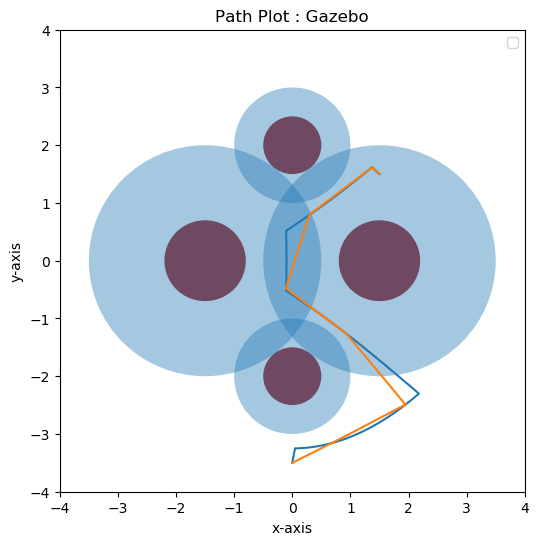

In [26]:
x_data2=[]
y_data2=[]
for i,tuple_ in enumerate(co_ordinate):
    x_data2.append(tuple_[0])
    y_data2.append(tuple_[1])

x_data3=[]
y_data3=[]
for i,tuple_ in enumerate(odom_data):
    x_data3.append(tuple_[0])
    y_data3.append(tuple_[1])
# rectangle= plt.Rectangle((0.4,0.4),1.1,1.1,fc='brown')
obs1=plt.Circle((0,2),0.5,fc='brown')
obs1_=plt.Circle((0,2),1,alpha=0.4)
obs2=plt.Circle((1.5,0),0.7,fc='brown')
obs2_=plt.Circle((1.5,0),2,alpha=0.4)
obs3=plt.Circle((0,-2),0.5,fc='brown')
obs3_=plt.Circle((0,-2),1,alpha=0.4)
obs4=plt.Circle((-1.5,0),0.7,fc='brown')
obs4_=plt.Circle((-1.5,0),2,alpha=0.4)
fig=plt.figure(figsize=(6,6))

plt.gca().add_patch(obs1)
plt.gca().add_patch(obs1_)
plt.gca().add_patch(obs2)
plt.gca().add_patch(obs2_)
plt.gca().add_patch(obs3)
plt.gca().add_patch(obs3_)
plt.gca().add_patch(obs4)
plt.gca().add_patch(obs4_)
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.plot(x_data2,y_data2)
plt.plot(x_data3,y_data3)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Path Plot : Gazebo')
plt.legend()